In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_csv("DATA.csv")
# CHECKING  NO OF MISSING VALUES IN EACH COLUMN
data.isnull().sum()


Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64

In [5]:
# DISTRIBUTION  OF Positive cases and negative cases 
print(data['MonkeyPox'].value_counts())
print()

print('Percentage of No Positive cases: {}%'.format(round(data.MonkeyPox.value_counts()['Positive']/len(data) * 100.0,2)))
print('Percentage of Negative cases: {}%'.format(round(data.MonkeyPox.value_counts()['Negative']/len(data) * 100.0,2)))

MonkeyPox
Positive    15909
Negative     9091
Name: count, dtype: int64

Percentage of No Positive cases: 63.64%
Percentage of Negative cases: 36.36%


In [6]:
#Unique values present in every column  
for col in data.columns:
    unique_values=data[col].unique()
    print(f"UNIQUE VALUES IN A COLUMN'{col}':{unique_values}'")
    print()

UNIQUE VALUES IN A COLUMN'Patient_ID':['P0' 'P1' 'P2' ... 'P24997' 'P24998' 'P24999']'

UNIQUE VALUES IN A COLUMN'Systemic Illness':[nan 'Fever' 'Swollen Lymph Nodes' 'Muscle Aches and Pain']'

UNIQUE VALUES IN A COLUMN'Rectal Pain':[False  True]'

UNIQUE VALUES IN A COLUMN'Sore Throat':[ True False]'

UNIQUE VALUES IN A COLUMN'Penile Oedema':[ True False]'

UNIQUE VALUES IN A COLUMN'Oral Lesions':[ True False]'

UNIQUE VALUES IN A COLUMN'Solitary Lesion':[False  True]'

UNIQUE VALUES IN A COLUMN'Swollen Tonsils':[ True False]'

UNIQUE VALUES IN A COLUMN'HIV Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'Sexually Transmitted Infection':[False  True]'

UNIQUE VALUES IN A COLUMN'MonkeyPox':['Negative' 'Positive']'



In [7]:
#Converting the text into numerical of all the columns 
features=["Rectal Pain","Sore Throat","Penile Oedema","Oral Lesions","Solitary Lesion","Swollen Tonsils","HIV Infection","Sexually Transmitted Infection"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})

C:\Users\pulip\AppData\Local\Temp\ipykernel_9644\270484086.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({True:1,False:0})


In [8]:
data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})

C:\Users\pulip\AppData\Local\Temp\ipykernel_9644\2458704213.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})


In [9]:
import pandas as pd

# Fill missing values with a specific value
data['Systemic Illness'].fillna('Unknown', inplace=True)

# Perform one-hot encoding
data = pd.get_dummies(data, columns=['Systemic Illness'])

# Print the first few rows of the preprocessed data
print(data.head())

  Patient_ID  Rectal Pain  Sore Throat  Penile Oedema  Oral Lesions  \
0         P0            0            1              1             1   
1         P1            1            0              1             1   
2         P2            0            1              1             0   
3         P3            1            0              0             0   
4         P4            1            1              1             0   

   Solitary Lesion  Swollen Tonsils  HIV Infection  \
0                0                1              0   
1                0                0              1   
2                0                0              1   
3                1                1              1   
4                0                1              1   

   Sexually Transmitted Infection  MonkeyPox  Systemic Illness_Fever  \
0                               0          0                   False   
1                               0          1                    True   
2                               

C:\Users\pulip\AppData\Local\Temp\ipykernel_9644\1155651068.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Systemic Illness'].fillna('Unknown', inplace=True)


In [10]:
#Converting the text into numerical of all the columns 
features=["Systemic Illness_Fever","Systemic Illness_Muscle Aches and Pain", "Systemic Illness_Swollen Lymph Nodes","Systemic Illness_Unknown"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})

C:\Users\pulip\AppData\Local\Temp\ipykernel_9644\3163387298.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col]=data[col].replace({True:1,False:0})


In [11]:
data['Patient_ID'] = data['Patient_ID'].str.replace('P','', regex=False).astype(int)

In [12]:
data

,Patient_ID,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Systemic Illness_Unknown
0,0,0,1,1,1,0,1,0,0,0,0,0,0,1
1,1,1,0,1,1,0,0,1,0,1,1,0,0,0
2,2,0,1,1,0,0,0,1,0,1,1,0,0,0
3,3,1,0,0,0,1,1,1,0,1,0,0,0,1
4,4,1,1,1,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24995,1,1,0,1,1,0,0,1,1,0,0,0,1
24996,24996,0,1,1,0,1,1,1,1,1,1,0,0,0
24997,24997,1,1,0,0,1,1,0,0,1,0,0,0,1
24998,24998,0,1,0,1,1,1,0,0,0,0,0,1,0


In [13]:
#

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Patient_ID                              25000 non-null  int32
 1   Rectal Pain                             25000 non-null  int64
 2   Sore Throat                             25000 non-null  int64
 3   Penile Oedema                           25000 non-null  int64
 4   Oral Lesions                            25000 non-null  int64
 5   Solitary Lesion                         25000 non-null  int64
 6   Swollen Tonsils                         25000 non-null  int64
 7   HIV Infection                           25000 non-null  int64
 8   Sexually Transmitted Infection          25000 non-null  int64
 9   MonkeyPox                               25000 non-null  int64
 10  Systemic Illness_Fever                  25000 non-null  int64
 11  Systemic Illnes

# FEATURE SELECTION PROCESS

# Filter Methods using selectkbest

# Feature Selection Using chi-square 

# Mutual Information 

In [8]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.        , 0.01529288, 0.01814506, 0.0052346 , 0.00647799,
       0.01314635, 0.        , 0.        , 0.01182662, 0.00614078])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Rectal Pain                       0.018145
Systemic Illness                  0.015293
Oral Lesions                      0.013146
HIV Infection                     0.011827
Penile Oedema                     0.006478
Sexually Transmitted Infection    0.006141
Sore Throat                       0.005235
Patient_ID                        0.000000
Solitary Lesion                   0.000000
Swollen Tonsils                   0.000000
dtype: float64

<Axes: >

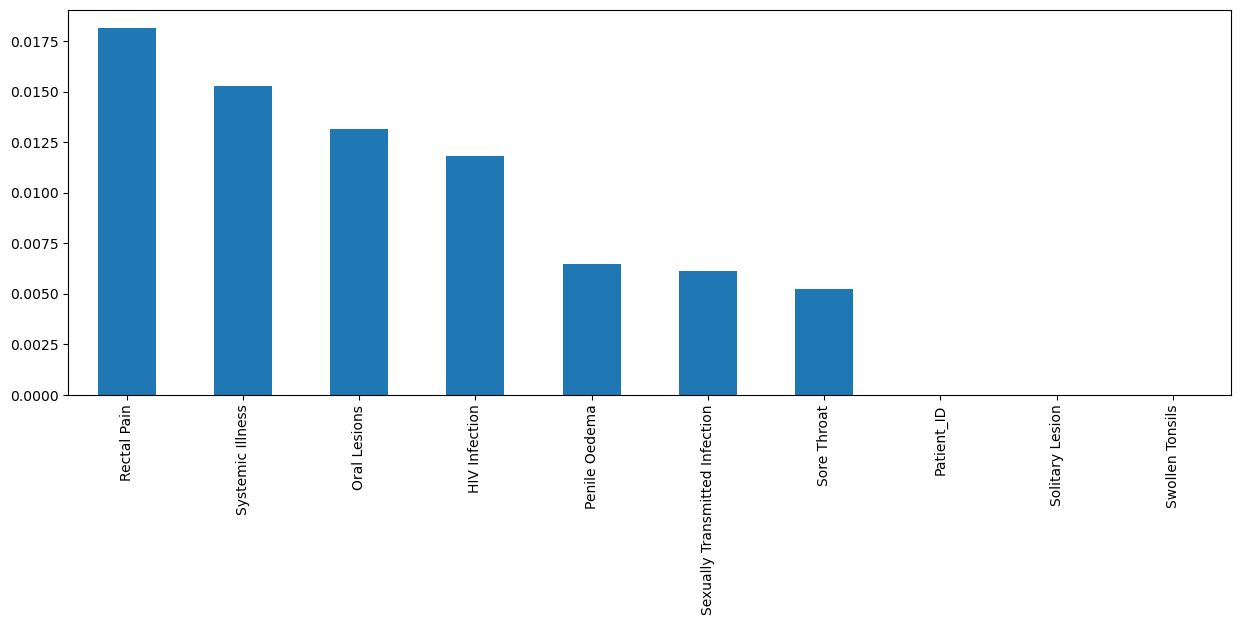

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))


In [17]:

X_train

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
10263,10263,1,0,1,0,1,0,1,0,1
18409,18409,2,1,0,0,1,0,1,1,0
13047,13047,1,0,0,0,1,0,0,0,1
21371,21371,2,1,1,1,0,1,1,0,0
16392,16392,2,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13123,13123,2,1,1,0,0,1,0,1,1
19648,19648,3,1,0,1,1,1,1,1,0
9845,9845,1,1,0,0,1,1,1,1,1
10799,10799,1,1,1,1,1,1,1,0,1


# Mutual Information 

In [23]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

X = data.drop('MonkeyPox', axis=1)  
y = data['MonkeyPox']

# Apply mutual information for classification (adjust for regression if needed)
mi_scores = mutual_info_classif(X, y)

# Set a threshold for mutual information
threshold = 0.5
selected_features = X.columns[mi_scores > threshold]

# Print selected features
print(selected_features)

Index([], dtype='object')


# PCA

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

X = data.drop('MonkeyPox', axis=1)  
y = data['MonkeyPox']

# Apply PCA
pca = PCA(n_components=min(X.shape[1], 8))  # Adjust the number of components
X_pca = pca.fit_transform(X)

# Analyze explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Select features based on explained variance
threshold = 0.9
num_components = np.where(cumulative_explained_variance > threshold)[0][0] + 1
selected_features = X.columns[:num_components]

# Print selected features
print(selected_features)

Index(['Patient_ID'], dtype='object')


# Mutual information 

In [27]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

X = data.drop('MonkeyPox', axis=1)  
y = data['MonkeyPox']


mi_scores = mutual_info_classif(X, y)

# Rank features based on mutual information scores
ranked_features = X.columns[mi_scores.argsort()[::-1]]
num_features = 7
selected_features = ranked_features[:num_features]
print(selected_features)

Index(['Rectal Pain', 'HIV Infection', 'Sexually Transmitted Infection',
       'Systemic Illness', 'Solitary Lesion', 'Oral Lesions', 'Sore Throat'],
      dtype='object')


# ANOVA

In [39]:
import pandas as pd
import scipy.stats as stats

def apply_anova_t_test(df, target_column):
    X = df.drop(columns=target_column)
    y = df[target_column]
    category1 = df[target_column].unique()[0]
    category2 = df[target_column].unique()[1]

    p_values = []
    for feature in X.columns:
        if y.dtype == 'MonkeyPox':  # Categorical target
            f_statistic, p_value = stats.f_oneway(*[X[feature][y == category] for category in y.unique()])
        else:  # Continuous target
            group1 = X[feature][y == category1]
            group2 = X[feature][y == category2]
            t_statistic, p_value = stats.ttest_ind(group1, group2)

        p_values.append(p_value)

    # significance level (e.g., 0.05)
    threshold = 0.35
    selected_features = X.columns[p_values < [threshold] * len(p_values)]

    return selected_features

# Apply ANOVA and t-test for feature selection
selected_features = apply_anova_t_test(data, 'MonkeyPox')
print(selected_features)

[['Patient_ID' 'Systemic Illness' 'Rectal Pain' 'Sore Throat'
  'Penile Oedema' 'Oral Lesions' 'Solitary Lesion' 'Swollen Tonsils'
  'HIV Infection' 'Sexually Transmitted Infection']]


C:\Users\pulip\AppData\Local\Temp\ipykernel_16192\2044188359.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  selected_features = X.columns[p_values < [threshold] * len(p_values)]


<Axes: title={'center': 'Selected Features with p-Values'}>

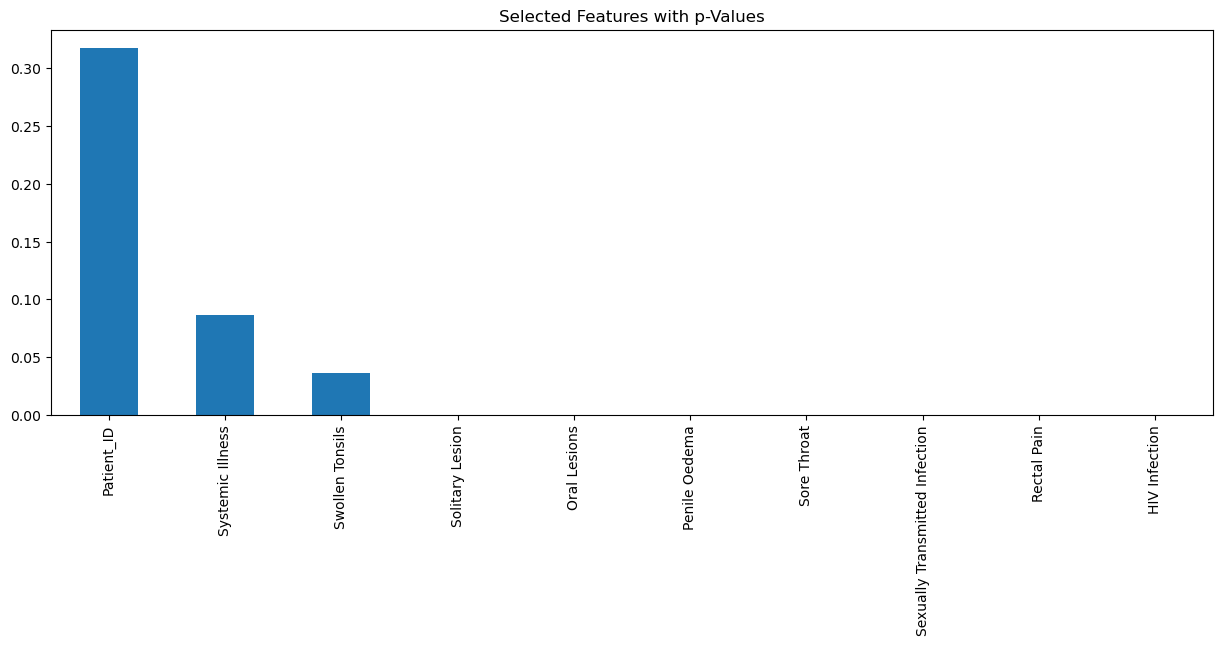

In [46]:
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import train_test_split

def apply_anova_t_test(data, target_column):
    X = data.drop(columns=target_column)
    y = data[target_column]
    category1 = y.unique()[0]
    category2 = y.unique()[1]

    p_values = []
    for feature in X.columns:
        if y.dtype == 'object':  # Categorical target
            f_statistic, p_value = stats.f_oneway(*[X[feature][y == category] for category in y.unique()])
        else: #target
            group1 = X[feature][y == category1]
            group2 = X[feature][y == category2]
            t_statistic, p_value = stats.ttest_ind(group1, group2)
        p_values.append(p_value)

    # Significance level (e.g., 0.05)
    threshold = 0.05
    selected_features = X.columns[np.array(p_values) < threshold]  

    return pd.Series(p_values, index=X.columns, name='p_value').sort_values(ascending=False)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='MonkeyPox'),
                                                  data['MonkeyPox'],
                                                  test_size=0.2,
                                                  random_state=0)

# Feature selection using ANOVA/t-test ( binary target)
selected_features = apply_anova_t_test(data, 'MonkeyPox')
selected_features.plot.bar(figsize=(15, 5), title='Selected Features with p-Values')

# Boruta

In [1]:
import pandas as pd
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

X = data.drop('MonkeyPox', axis=1)  
y = data['MonkeyPox']

# Create random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Apply Boruta
boruta = BorutaPy(rf, n_estimators=100, verbose=2, random_state=42)
boruta.fit(X.values, y.values)

# Select features
selected_features = X.columns[boruta.support_].tolist()

# Print selected features
print(selected_features)

ModuleNotFoundError: No module named 'boruta'

# FEATURE SELECTION WITH ( BELL CURVE)

Selected Features using Chi-Squared Test for k=1: ['Patient_ID']


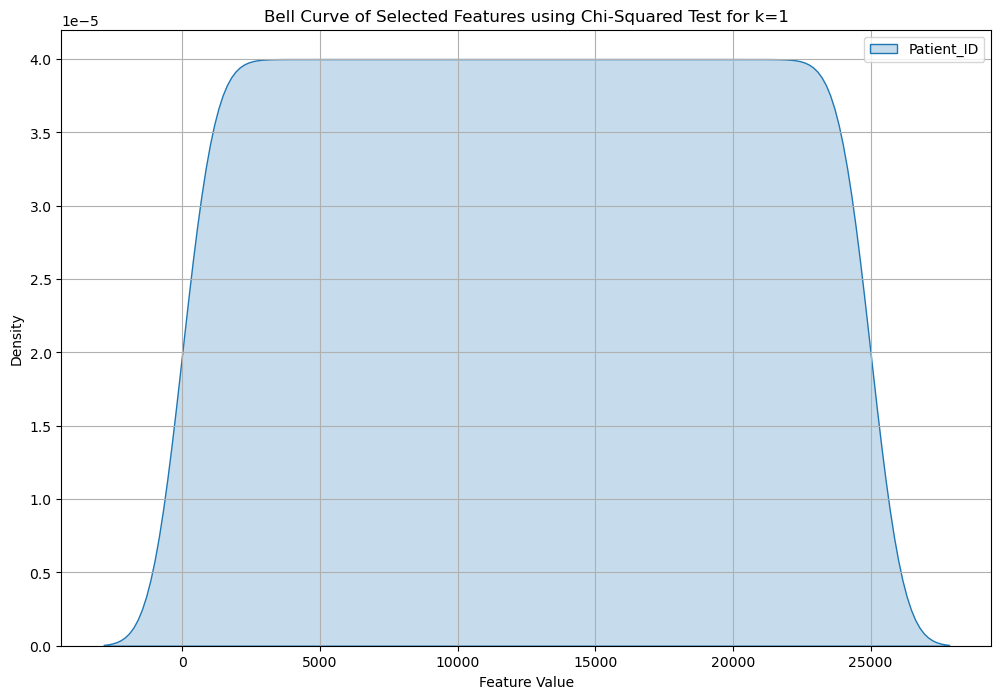

Selected Features using Chi-Squared Test for k=2: ['Patient_ID', 'HIV Infection']


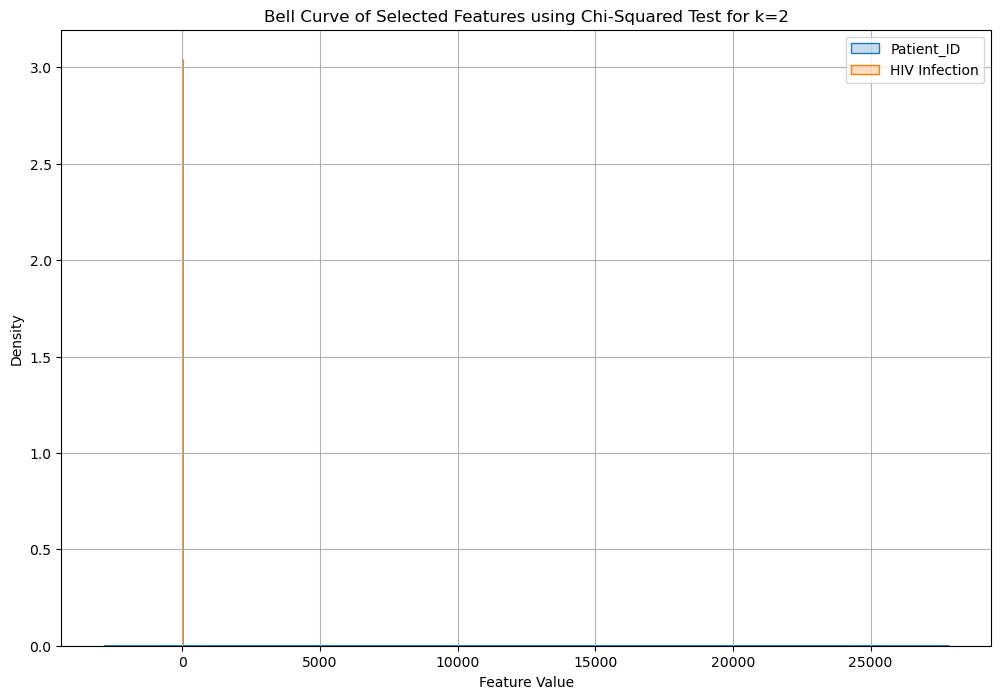

Selected Features using Chi-Squared Test for k=3: ['Patient_ID', 'Rectal Pain', 'HIV Infection']


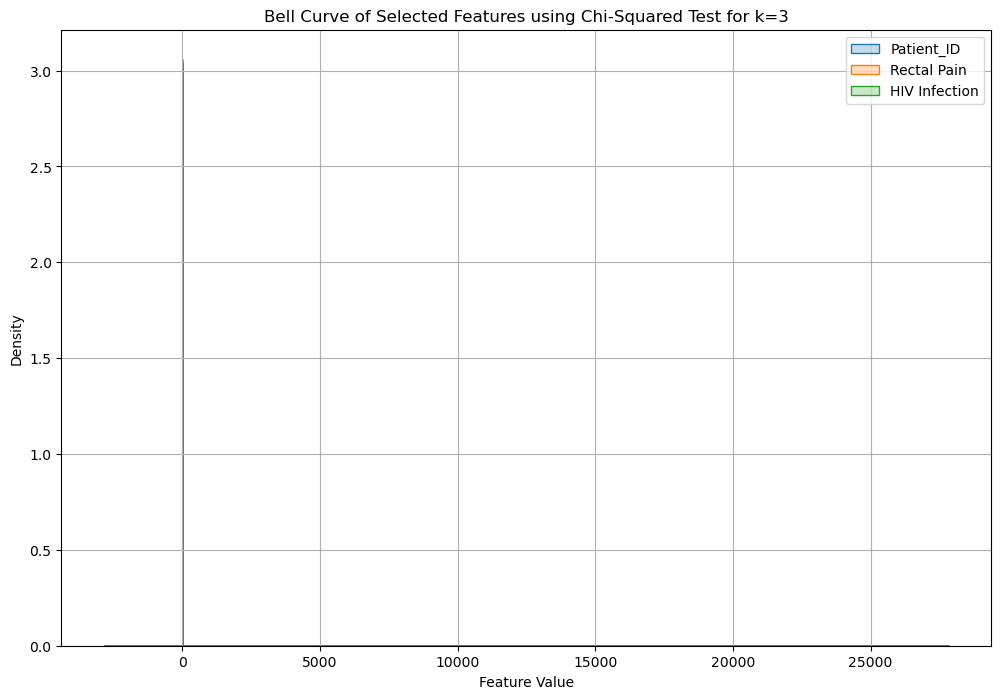

Selected Features using Chi-Squared Test for k=4: ['Patient_ID', 'Rectal Pain', 'HIV Infection', 'Sexually Transmitted Infection']


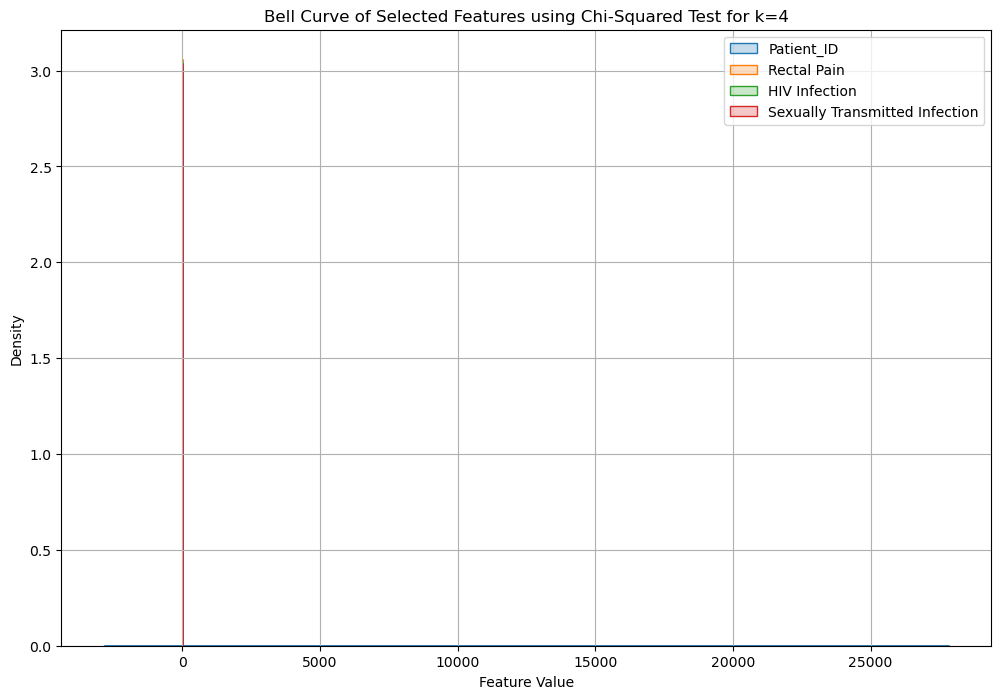

Selected Features using Chi-Squared Test for k=5: ['Patient_ID', 'Rectal Pain', 'Sore Throat', 'HIV Infection', 'Sexually Transmitted Infection']


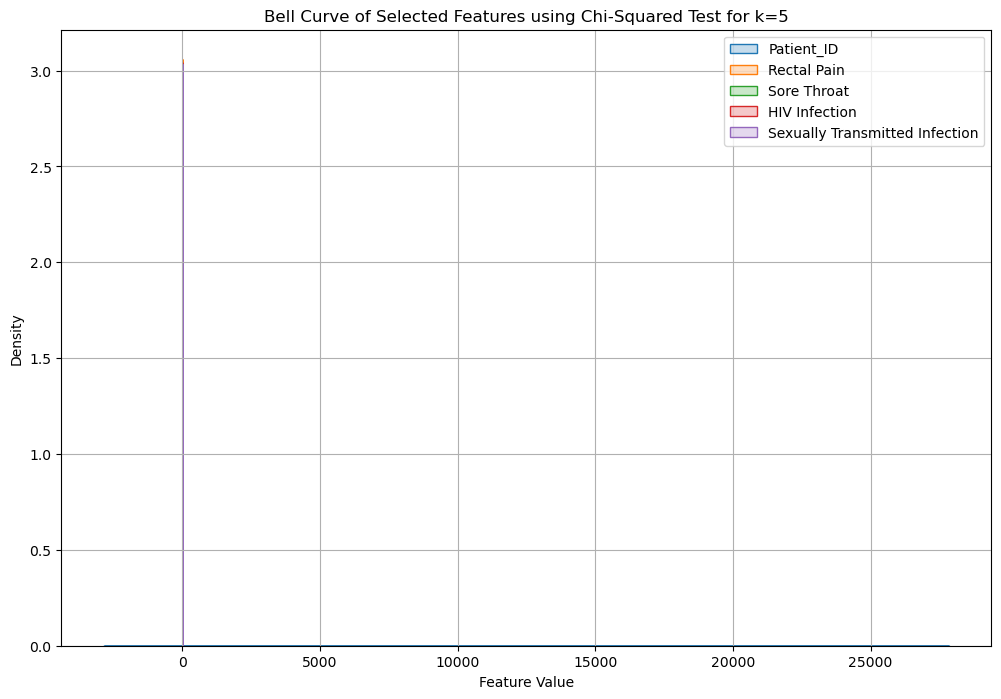

Selected Features using Chi-Squared Test for k=6: ['Patient_ID', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'HIV Infection', 'Sexually Transmitted Infection']


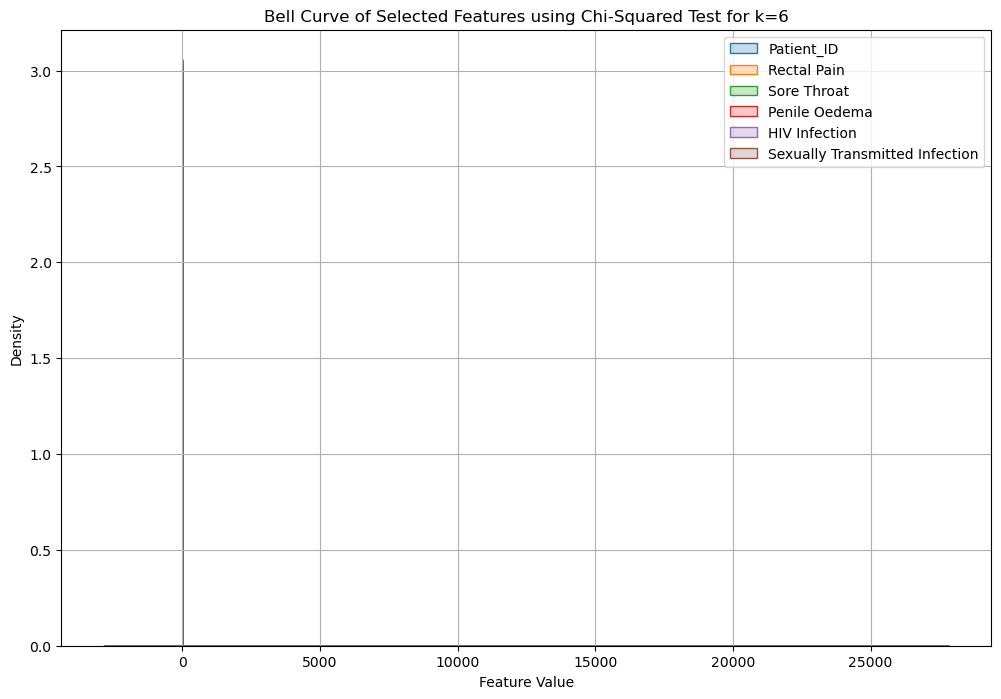

Selected Features using Chi-Squared Test for k=7: ['Patient_ID', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'HIV Infection', 'Sexually Transmitted Infection']


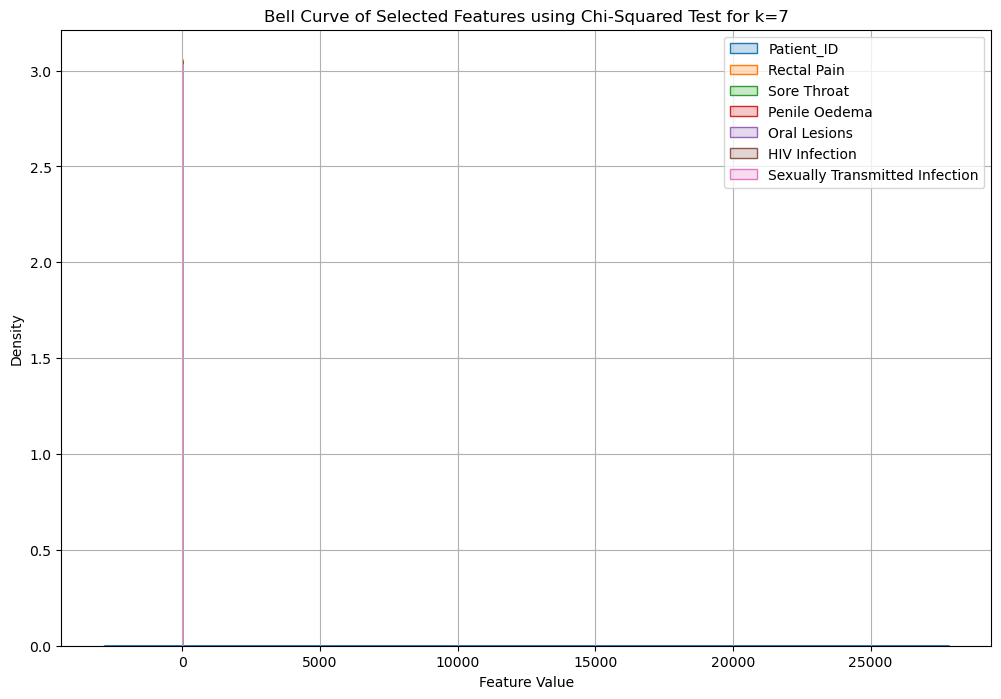

Selected Features using Chi-Squared Test for k=8: ['Patient_ID', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'HIV Infection', 'Sexually Transmitted Infection']


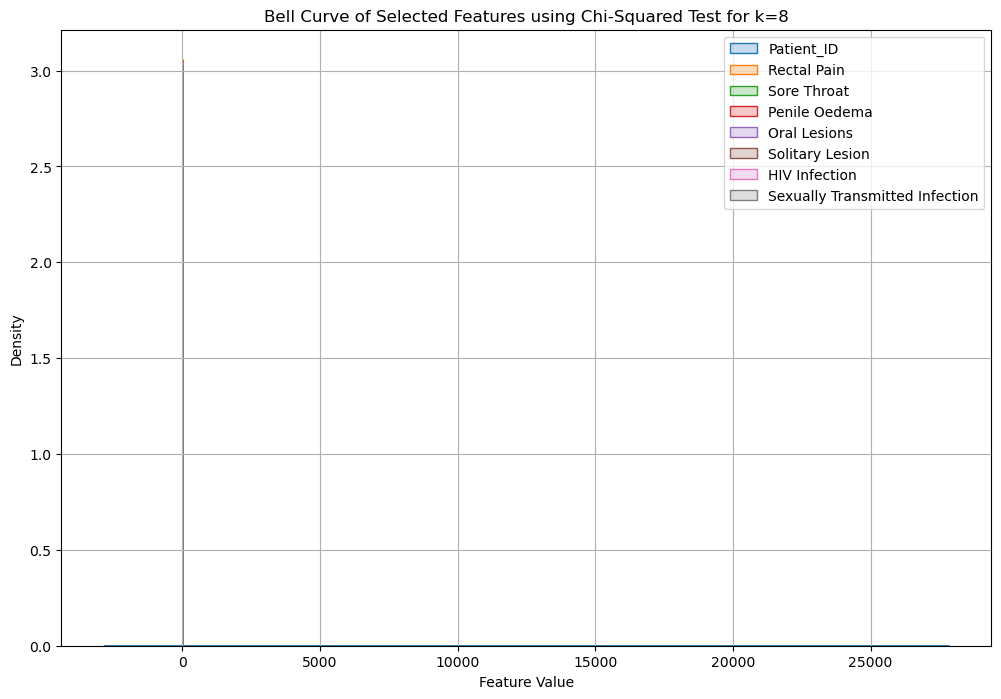

Selected Features using Chi-Squared Test for k=9: ['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'HIV Infection', 'Sexually Transmitted Infection']


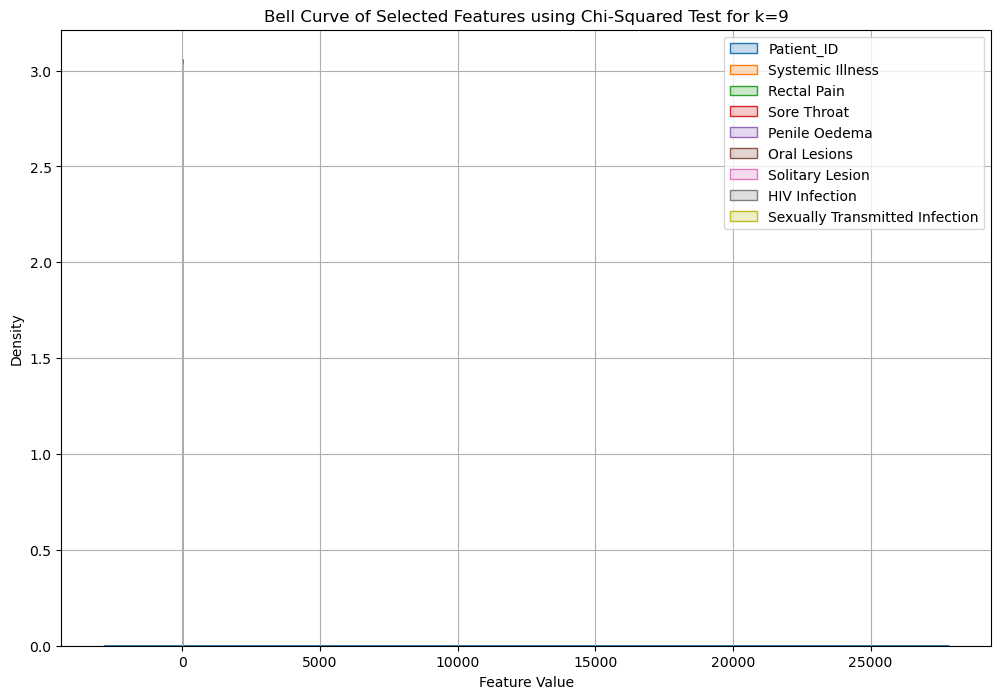

Selected Features using Chi-Squared Test for k=10: ['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']


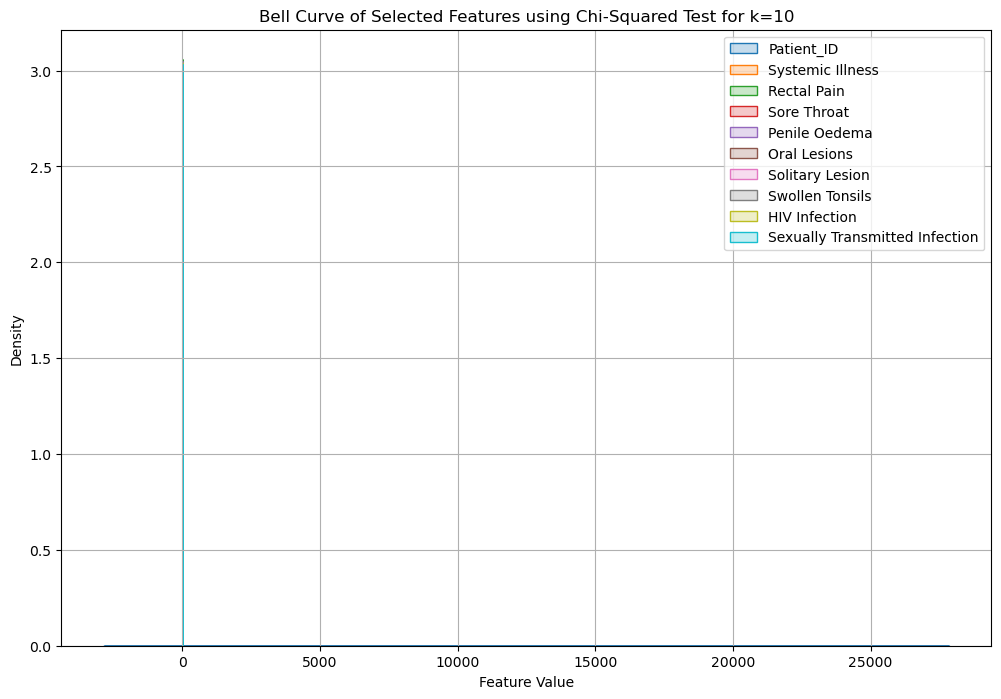

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

X = data.drop('MonkeyPox', axis=1)  
y = data['MonkeyPox']
# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Get the number of features in your dataset
num_features = X_encoded.shape[1]

# Loop through k from 1 to the number of features available (up to 10)
for k in range(1, min(num_features + 1, 11)):
    # Feature Selection using Chi-Squared Test (Filter Method)
    chi2_selector = SelectKBest(score_func=chi2, k=k)  # Select top k features
    X_chi2 = chi2_selector.fit_transform(X_encoded, y)
    selected_features_chi2 = X.columns[chi2_selector.get_support()]

    print(f"Selected Features using Chi-Squared Test for k={k}:", selected_features_chi2.tolist())

    # Visualize Selected Features with Bell Curve
    selected_data_chi2 = X_encoded[list(selected_features_chi2)]

    # Plotting Bell Curve for each selected feature
    plt.figure(figsize=(12, 8))
    for feature in selected_data_chi2.columns:
        sns.kdeplot(selected_data_chi2[feature], label=feature, fill=True)

    plt.title(f'Bell Curve of Selected Features using Chi-Squared Test for k={k}')
    plt.xlabel('Feature Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()

# FEATURE  SELECTION BY USING (Gradient boosting)

# Chi2  (GB)

In [15]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load your data (replace 'data' with your actual data)
X = data.drop('MonkeyPox', axis=1)
y = data['MonkeyPox']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection with chi-squared test (select k-value for No of  features)
chi2_selector = SelectKBest(score_func=chi2, k=4)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Get selected feature names
selected_feature_indices = chi2_selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()
print("Selected Features: ", selected_feature_names)
print("NO OF SELECTED FEATURES:",len(selected_feature_names))

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the selected features
model.fit(X_train_chi2, y_train)

# Evaluate the model
y_pred = model.predict(X_test_chi2)  # Make predictions

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Get confusion matrix for calculating specificity
cm = confusion_matrix(y_test, y_pred)
tn = cm[0, 0]  # True Negatives
fp = cm[0, 1]  # False Positives
specificity = tn / (tn + fp)

print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {auc_roc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")

Selected Features:  ['HIV Infection', 'Systemic Illness_Fever', 'Systemic Illness_Muscle Aches and Pain', 'Systemic Illness_Unknown']
NO OF SELECTED FEATURES: 4
Model Performance:
Accuracy: 67.18%
Precision: 71.14%
Recall: 83.21%
F1-score: 76.70%
AUC-ROC: 60.36%
Specificity: 37.51%


# Chi-square using stratified k fold 

In [42]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load your data (replace 'data' with your actual DataFrame)
 # Update this line with your dataset path
X = data.drop('MonkeyPox', axis=1)
y = data['MonkeyPox']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection with chi-squared test (select 9 features)
chi2_selector = SelectKBest(score_func=chi2, k=9)
X_train_chi2 = chi2_selector.fit_transform(X_train, y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Get selected feature names
selected_feature_indices = chi2_selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()
print("Selected Features: ", selected_feature_names)
print("Number of Selected Features:", len(selected_feature_names))

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Implement Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
all_metrics = []

for train_index, val_index in skf.split(X_train_chi2, y_train):
    X_train_fold, X_val_fold = X_train_chi2[train_index], X_train_chi2[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fit the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Make predictions on validation set
    y_val_pred = model.predict(X_val_fold)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_val_fold, y_val_pred)
    precision = precision_score(y_val_fold, y_val_pred)
    recall = recall_score(y_val_fold, y_val_pred)
    f1 = f1_score(y_val_fold, y_val_pred)
    auc_roc = roc_auc_score(y_val_fold, y_val_pred)

    # Get confusion matrix for calculating specificity
    cm = confusion_matrix(y_val_fold, y_val_pred)
    tn = cm[0, 0]  # True Negatives
    fp = cm[0, 1]  # False Positives
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    all_metrics.append({
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'auc_roc': auc_roc,
        'specificity': specificity
    })

# Calculate average metrics across all folds
avg_metrics = {metric: sum(d[metric] for d in all_metrics) / len(all_metrics) for metric in all_metrics[0]}
print("\nAverage Model Performance Across All Folds:")
print(f"Accuracy: {avg_metrics['accuracy'] * 100:.2f}%")
print(f"Precision: {avg_metrics['precision'] * 100:.2f}%")
print(f"Recall: {avg_metrics['recall'] * 100:.2f}%")
print(f"F1-score: {avg_metrics['f1_score'] * 100:.2f}%")
print(f"AUC-ROC: {avg_metrics['auc_roc'] * 100:.2f}%")
print(f"Specificity: {avg_metrics['specificity'] * 100:.2f}%")

C:\Users\pulip\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\pulip\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
C:\Users\pulip\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common

Selected Features:  ['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'HIV Infection', 'Sexually Transmitted Infection']
Number of Selected Features: 9

Average Model Performance Across All Folds:
Accuracy: 68.91%
Precision: 70.26%
Recall: 88.25%
F1-score: 78.24%
AUC-ROC: 61.89%
Specificity: 35.53%


# Mutual Information (GB)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply mutual information feature selection
mi_selector = SelectKBest(score_func=mutual_info_classif, k=6)  # Select top 5 features
X_train_mi = mi_selector.fit_transform(X_train, y_train)
X_test_mi = mi_selector.transform(X_test)

# Get selected feature names
selected_feature_indices = mi_selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()

print("Selected Features using Mutual Information: ", selected_feature_names)

# Initialize and fit Gradient Boosting Classifier on selected features
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_mi, y_train)

# Evaluate model's accuracy on test set
accuracy = model.score(X_test_mi, y_test)
print("Model Accuracy with Mutual Information Selected Features: {:.2f}%".format(accuracy * 100))

Selected Features using Mutual Information:  ['Systemic Illness', 'Rectal Pain', 'Penile Oedema', 'Solitary Lesion', 'HIV Infection', 'Sexually Transmitted Infection']
Model Accuracy with Mutual Information Selected Features: 70.08%


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply mutual information feature selection (select top 4 features)
mi_selector = SelectKBest(score_func=mutual_info_classif, k=6)
X_train_mi = mi_selector.fit_transform(X_train, y_train)
X_test_mi = mi_selector.transform(X_test)

# Get selected feature names
selected_feature_indices = mi_selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()

print("Selected Features using Mutual Information: ", selected_feature_names)
print("NO OF SELECTED FEATURES:",len(selected_feature_names))

# Initialize and fit Gradient Boosting Classifier on selected features
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_mi, y_train)

# Evaluate model's performance
y_pred = model.predict(X_test_mi)  # Make predictions

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# Get confusion matrix for calculating specificity
cm = confusion_matrix(y_test, y_pred)
tn = cm[0, 0]  # True Negatives
fp = cm[0, 1]  # False Positives
specificity = tn / (tn + fp)

print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {auc_roc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")

Selected Features using Mutual Information:  ['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Solitary Lesion', 'HIV Infection', 'Sexually Transmitted Infection']
NO OF SELECTED FEATURES: 6
Model Performance:
Accuracy: 70.06%
Precision: 71.77%
Recall: 88.82%
F1-score: 79.39%
AUC-ROC: 62.08%
Specificity: 35.35%


# Fisher Score  (GB)

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import f_oneway

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Function to calculate Fisher Score for each feature
def fisher_score(X, y):
    classes = np.unique(y)
    num_classes = len(classes)
    scores = []
    
    for i in range(X.shape[1]):
        # Calculate the mean and variance for each class
        class_means = []
        class_vars = []
        
        for c in classes:
            class_samples = X[y == c].iloc[:, i]
            class_means.append(class_samples.mean())
            class_vars.append(class_samples.var(ddof=1))  # Sample variance
        
        # Calculate overall mean and variance
        overall_mean = X.iloc[:, i].mean()
        overall_var = X.iloc[:, i].var(ddof=1)
        
        # Calculate Fisher score: (between-class variance) / (within-class variance)
        numerator = sum(len(X[y == c]) * (class_mean - overall_mean) ** 2 for class_mean, c in zip(class_means, classes))
        denominator = sum((len(X[y == c]) - 1) * class_var for class_var, c in zip(class_vars, classes))
        
        if denominator == 0:
            scores.append(0)
        else:
            scores.append(numerator / denominator)
    
    return scores

# Step 1: Calculate Fisher Scores for all features
fisher_scores = fisher_score(X_encoded, y)

# Step 2: Select top k features based on Fisher Scores
k = 5 # Specify number of top features to select
top_k_indices = np.argsort(fisher_scores)[-k:]  # Get indices of top k features
X_selected = X_encoded.iloc[:, top_k_indices]

# Step 3: Standardize selected features before training the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 4: Train Gradient Boosting Classifier using selected features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate performancescalar 
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy of Gradient Boosting Model with top {k} Fisher-selected features: {accuracy:.4f}")
print("Classification Report:\n", report)

# Print selected feature names based on Fisher Scores
selected_feature_names = X.columns[top_k_indices]
print("\nSelected Features based on Fisher Score:")
for feature in selected_feature_names:
    print(feature)


Accuracy of Gradient Boosting Model with top 5 Fisher-selected features: 0.6686
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.29      0.38      1754
           1       0.70      0.87      0.77      3246

    accuracy                           0.67      5000
   macro avg       0.62      0.58      0.58      5000
weighted avg       0.65      0.67      0.64      5000


Selected Features based on Fisher Score:
Penile Oedema
Sore Throat
Sexually Transmitted Infection
Rectal Pain
HIV Infection


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Function to calculate Fisher Score for each feature
def fisher_score(X, y):
    classes = np.unique(y)
    num_classes = len(classes)
    scores = []
    
    for i in range(X.shape[1]):
        # Calculate the mean and variance for each class
        class_means = []
        class_vars = []
        
        for c in classes:
            class_samples = X[y == c].iloc[:, i]
            class_means.append(class_samples.mean())
            class_vars.append(class_samples.var(ddof=1))  # Sample variance
        
        # Calculate overall mean and variance
        overall_mean = X.iloc[:, i].mean()
        overall_var = X.iloc[:, i].var(ddof=1)
        
        # Calculate Fisher score: (between-class variance) / (within-class variance)
        numerator = sum(len(X[y == c]) * (class_mean - overall_mean) ** 2 for class_mean, c in zip(class_means, classes))
        denominator = sum((len(X[y == c]) - 1) * class_var for class_var, c in zip(class_vars, classes))
        
        if denominator == 0:
            scores.append(0)
        else:
            scores.append(numerator / denominator)
    
    return scores

# Step 1: Calculate Fisher Scores for all features
fisher_scores = fisher_score(X_encoded, y)

# Step 2: Select top k features based on Fisher Scores
k = 5 # Specify number of top features to select
top_k_indices = np.argsort(fisher_scores)[-k:]  # Get indices of top k features
X_selected = X_encoded.iloc[:, top_k_indices]

# Step 3: Standardize selected features before training the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 4: Train Gradient Boosting Classifier using selected features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate performances
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

report = classification_report(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-score: {f1 * 100:.2f}%")
print(f"AUC-ROC: {auc_roc * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")

# Print selected feature names based on Fisher Scores
selected_feature_names = X.columns[top_k_indices]
print("\nSelected Features based on Fisher Score:")
for feature in selected_feature_names:
    print(feature)

Model Performance:
Accuracy: 66.86%
Precision: 69.55%
Recall: 87.06%
F1-score: 77.33%
AUC-ROC: 58.27%
Specificity: 35.35%

Selected Features based on Fisher Score:
Penile Oedema
Sore Throat
Sexually Transmitted Infection
Rectal Pain
HIV Infection


In [31]:
# The  below code is Fisher  score  and  it has no standard scalar 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import f_oneway

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Function to calculate Fisher Score for each feature
def fisher_score(X, y):
    classes = np.unique(y)
    num_classes = len(classes)
    scores = []

    for i in range(X.shape[1]):
        # Calculate the mean and variance for each class
        class_means = []
        class_vars = []

        for c in classes:
            class_samples = X[y == c].iloc[:, i]
            class_means.append(class_samples.mean())
            class_vars.append(class_samples.var(ddof=1))  # Sample variance

        # Calculate overall mean and variance
        overall_mean = X.iloc[:, i].mean()
        overall_var = X.iloc[:, i].var(ddof=1)

        # Calculate Fisher score: (between-class variance) / (within-class variance)
        numerator = sum(len(X[y == c]) * (class_mean - overall_mean) ** 2 for class_mean, c in zip(class_means, classes))
        denominator = sum((len(X[y == c]) - 1) * class_var for class_var, c in zip(class_vars, classes))

        if denominator == 0:
            scores.append(0)
        else:
            scores.append(numerator / denominator)

    return scores

# Step 1: Calculate Fisher Scores for all features
fisher_scores = fisher_score(X_encoded, y)

# Step 2: Select top k features based on Fisher Scores
k = 6 # Specify number of top features to select
top_k_indices = np.argsort(fisher_scores)[-k:]  # Get indices of top k features
X_selected = X_encoded.iloc[:, top_k_indices]

# Step 3: Train Gradient Boosting Classifier using selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy of Gradient Boosting Model with top {k} Fisher-selected features: {accuracy:.4f}")
print("Classification Report:\n", report)

# Print selected feature names based on Fisher Scores
selected_feature_names = X.columns[top_k_indices]
print("\nSelected Features based on Fisher Score:")
for feature in selected_feature_names:
    print(feature)


Accuracy of Gradient Boosting Model with top 5 Fisher-selected features: 0.6686
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.29      0.38      1754
           1       0.70      0.87      0.77      3246

    accuracy                           0.67      5000
   macro avg       0.62      0.58      0.58      5000
weighted avg       0.65      0.67      0.64      5000


Selected Features based on Fisher Score:
Penile Oedema
Sore Throat
Sexually Transmitted Infection
Rectal Pain
HIV Infection


# ANOVA (Gradient Boosting)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif


# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ANOVA feature selection
anova_selector = SelectKBest(score_func=f_classif, k=6)  # Select top 5 features
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Get selected feature names
selected_feature_indices = anova_selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()
print(" No  Of  Selected Features:", len(selected_feature_names))
print("Selected Features: ", selected_feature_names)


# Initialize and fit Gradient Boosting Classifier on selected features
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_anova, y_train)

# Evaluate model's accuracy on test set
accuracy = model.score(X_test_anova, y_test)
print("Model Accuracy with ANOVA Selected Features: {:.2f}%".format(accuracy * 100))

 No  Of  Selected Features: 6
Selected Features:  ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'HIV Infection', 'Sexually Transmitted Infection']
Model Accuracy with ANOVA Selected Features: 67.62%


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply ANOVA feature selection
anova_selector = SelectKBest(score_func=f_classif, k=6)  # Select top 6 features
X_train_anova = anova_selector.fit_transform(X_train, y_train)
X_test_anova = anova_selector.transform(X_test)

# Get selected feature names
selected_feature_indices = anova_selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()
print("No Of Selected Features:", len(selected_feature_names))
print("Selected Features: ", selected_feature_names)

# Initialize and fit Gradient Boosting Classifier on selected features
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_anova, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_anova)
y_pred_proba = model.predict_proba(X_test_anova)[:, 1]  # Get probabilities for AUC-ROC

# Evaluate model's accuracy on test set
accuracy = model.score(X_test_anova, y_test)
print("Model Accuracy with ANOVA Selected Features: {:.2f}%".format(accuracy * 100))

# Calculate precision, recall, F1-score using classification report
report = classification_report(y_test, y_pred, output_dict=True)
precision = report['1']['precision'] * 100  # Assuming '1' is the positive class label
recall = report['1']['recall'] * 100          # Assuming '1' is the positive class label
f1_score = report['1']['f1-score'] * 100      # Assuming '1' is the positive class label

# Calculate AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-score: {f1_score:.2f}%")
print(f"AUC-ROC Score: {roc_auc:.2f}%")
print(f"Specificity: {specificity:.2f}%")

No Of Selected Features: 6
Selected Features:  ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'HIV Infection', 'Sexually Transmitted Infection']
Model Accuracy with ANOVA Selected Features: 67.62%
Precision: 68.88%
Recall: 91.44%
F1-score: 78.57%
AUC-ROC Score: 0.65%
Specificity: 0.24%


# MultiSURF  ANOVA F-test (as a proxy for MultiSURF)

# Permutation Importance
4

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Step 1: Train a Gradient Boosting Classifier using all features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Step 2: Calculate Permutation Importance
result = permutation_importance(gb_model, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importance scores
importance_scores = result.importances_mean

# Create a DataFrame to hold feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance_scores
})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("Feature Importances based on Permutation Importance:")
print(importance_df)

# Step 3: Select top k features based on Permutation Importance
k = 7  # Specify number of top features to select
top_k_features = importance_df.head(k)['Feature'].values

print(f"\nTop {k} Features based on Permutation Importance:")
for feature in top_k_features:
    print(feature)

# Step 4: Train a new Gradient Boosting Classifier using only selected features
X_selected = X_encoded[top_k_features]

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

gb_model_selected = GradientBoostingClassifier()
gb_model_selected.fit(X_train_selected, y_train_selected)

# Make predictions with the selected features model
y_pred_selected = gb_model_selected.predict(X_test_selected)
y_pred_proba_selected = gb_model_selected.predict_proba(X_test_selected)[:, 1]  # Get probabilities for AUC-ROC

# Evaluate performance of the model with selected features
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
report_selected = classification_report(y_test_selected, y_pred_selected, output_dict=True)

# Calculate AUC-ROC Score
roc_auc = roc_auc_score(y_test_selected, y_pred_proba_selected)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test_selected, y_pred_selected).ravel()

# Calculate specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print(f"\nAccuracy of Gradient Boosting Model with top {k} selected features: {accuracy_selected:.2%}")
print(f"Precision: {report_selected['1']['precision']:.2%}")  # Assuming '1' is the positive class label
print(f"Recall: {report_selected['1']['recall']:.2%}")        # Assuming '1' is the positive class label
print(f"F1-score: {report_selected['1']['f1-score']:.2%}")   # Assuming '1' is the positive class label
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

Feature Importances based on Permutation Importance:
                          Feature  Importance
1                Systemic Illness    0.058467
2                     Rectal Pain    0.026560
8                   HIV Infection    0.024067
9  Sexually Transmitted Infection    0.014860
4                   Penile Oedema    0.005367
5                    Oral Lesions    0.004340
3                     Sore Throat    0.004113
6                 Solitary Lesion    0.001467
0                      Patient_ID    0.000593
7                 Swollen Tonsils   -0.000107

Top 7 Features based on Permutation Importance:
Systemic Illness
Rectal Pain
HIV Infection
Sexually Transmitted Infection
Penile Oedema
Oral Lesions
Sore Throat

Accuracy of Gradient Boosting Model with top 7 selected features: 70.32%
Precision: 72.29%
Recall: 88.02%
F1-score: 79.38%
AUC-ROC Score: 70.44%
Specificity: 37.57%


# SHAP

In [11]:

import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Step 1: Train a Gradient Boosting Classifier using all features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Step 2: Calculate SHAP values
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# Step 3: Get feature importance from SHAP values
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame to hold feature names and their SHAP importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Importance': shap_importance
})

# Sort the DataFrame by SHAP importance scores in descending order
importance_df = importance_df.sort_values(by='SHAP Importance', ascending=False)

# Print feature importance scores
print("Feature Importances based on SHAP values:")
print(importance_df)

# Step 4: Select top k features based on SHAP Importance
k = 9  # Specify number of top features to select
top_k_features = importance_df.head(k)['Feature'].values

print(f"\nTop {k} Features based on SHAP Importance:")
for feature in top_k_features:
    print(feature)

# Step 5: Train a new Gradient Boosting Classifier using only selected features
X_selected = X_encoded[top_k_features]

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

gb_model_selected = GradientBoostingClassifier()
gb_model_selected.fit(X_train_selected, y_train_selected)

# Make predictions with the selected features model
y_pred_selected = gb_model_selected.predict(X_test_selected)

# Evaluate performance of the model with selected features
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
report_selected = classification_report(y_test_selected, y_pred_selected)


print(f"\nAccuracy of Gradient Boosting Model with top {k} selected features: {accuracy_selected:.4f}")
print("Classification Report:\n", report_selected)

Feature Importances based on SHAP values:
                          Feature  SHAP Importance
1                Systemic Illness         0.450285
8                   HIV Infection         0.318851
2                     Rectal Pain         0.271926
9  Sexually Transmitted Infection         0.263969
3                     Sore Throat         0.123592
4                   Penile Oedema         0.118037
5                    Oral Lesions         0.104375
6                 Solitary Lesion         0.078390
0                      Patient_ID         0.044857
7                 Swollen Tonsils         0.022550

Top 9 Features based on SHAP Importance:
Systemic Illness
HIV Infection
Rectal Pain
Sexually Transmitted Infection
Sore Throat
Penile Oedema
Oral Lesions
Solitary Lesion
Patient_ID

Accuracy of Gradient Boosting Model with top 9 selected features: 0.7012
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.37      0.46      1754
        

In [52]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Step 1: Train a Gradient Boosting Classifier using all features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Step 2: Calculate SHAP values
explainer = shap.Explainer(gb_model, X_train)
shap_values = explainer(X_test)

# Step 3: Get feature importance from SHAP values
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Create a DataFrame to hold feature names and their SHAP importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Importance': shap_importance
})

# Sort the DataFrame by SHAP importance scores in descending order
importance_df = importance_df.sort_values(by='SHAP Importance', ascending=False)

# Print feature importance scores
print("Feature Importances based on SHAP values:")
print(importance_df)

# Step 4: Select top k features based on SHAP Importance
k = 7  # Specify number of top features to select
top_k_features = importance_df.head(k)['Feature'].values

print(f"\nTop {k} Features based on SHAP Importance:")
for feature in top_k_features:
    print(feature)

# Step 5: Train a new Gradient Boosting Classifier using only selected features
X_selected = X_encoded[top_k_features]

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

gb_model_selected = GradientBoostingClassifier()
gb_model_selected.fit(X_train_selected, y_train_selected)

# Make predictions with the selected features model
y_pred_selected = gb_model_selected.predict(X_test_selected)
y_pred_proba_selected = gb_model_selected.predict_proba(X_test_selected)[:, 1]  # Get probabilities for AUC-ROC

# Evaluate performance of the model with selected features
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
report_selected = classification_report(y_test_selected, y_pred_selected, output_dict=True)

# Calculate AUC-ROC Score
roc_auc = roc_auc_score(y_test_selected, y_pred_proba_selected)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test_selected, y_pred_selected).ravel()
# Calculate specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print(f"\nAccuracy of Gradient Boosting Model with top {k} selected features: {accuracy_selected:.2%}")
print(f"Precision: {report_selected['1']['precision']:.2%}")  # Assuming '1' is the positive class label
print(f"Recall: {report_selected['1']['recall']:.2%}")        # Assuming '1' is the positive class label
print(f"F1-score: {report_selected['1']['f1-score']:.2%}")   # Assuming '1' is the positive class label
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

 94%|=================== | 4705/5000 [00:12<00:00]       

Feature Importances based on SHAP values:
                          Feature  SHAP Importance
1                Systemic Illness         0.450285
8                   HIV Infection         0.318851
2                     Rectal Pain         0.271926
9  Sexually Transmitted Infection         0.263969
3                     Sore Throat         0.123592
4                   Penile Oedema         0.118037
5                    Oral Lesions         0.104375
6                 Solitary Lesion         0.078390
0                      Patient_ID         0.044857
7                 Swollen Tonsils         0.022550

Top 7 Features based on SHAP Importance:
Systemic Illness
HIV Infection
Rectal Pain
Sexually Transmitted Infection
Sore Throat
Penile Oedema
Oral Lesions

Accuracy of Gradient Boosting Model with top 7 selected features: 70.32%
Precision: 72.29%
Recall: 88.02%
F1-score: 79.38%
AUC-ROC Score: 70.44%
Specificity: 37.57%


# Embedded LightGBM

In [53]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Step 1: Train a LightGBM model using all features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Set parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'verbose': -1,
}

# Train the model
lgb_model = lgb.train(params, lgb_train)

# Step 2: Calculate feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgb_model.feature_importance(importance_type='gain')
})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance scores
print("Feature Importances based on LightGBM:")
print(importance_df)

# Step 3: Select top k features based on feature importance
k = 8  # Specify number of top features to select
top_k_features = importance_df.head(k)['Feature'].values

print(f"\nTop {k} Features based on LightGBM Importance:")
for feature in top_k_features:
    print(feature)

# Step 4: Train a new Gradient Boosting Classifier using only selected features
X_selected = X_encoded[top_k_features]

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y, test_size=0.2, random_state=42)

gb_model_selected = GradientBoostingClassifier()
gb_model_selected.fit(X_train_selected, y_train_selected)

# Make predictions with the selected features model
y_pred_selected = gb_model_selected.predict(X_test_selected)
y_pred_proba_selected = gb_model_selected.predict_proba(X_test_selected)[:, 1]  # Get probabilities for AUC-ROC

# Evaluate performance of the model with selected features
accuracy_selected = accuracy_score(y_test_selected, y_pred_selected)
report_selected = classification_report(y_test_selected, y_pred_selected, output_dict=True)

# Calculate AUC-ROC Score
roc_auc = roc_auc_score(y_test_selected, y_pred_proba_selected)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test_selected, y_pred_selected).ravel()

# Calculate specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print(f"\nAccuracy of Gradient Boosting Model with top {k} selected features: {accuracy_selected:.2%}")
print(f"Precision: {report_selected['1']['precision']:.2%}")  # Assuming '1' is the positive class label
print(f"Recall: {report_selected['1']['recall']:.2%}")        # Assuming '1' is the positive class label
print(f"F1-score: {report_selected['1']['f1-score']:.2%}")   # Assuming '1' is the positive class label
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

Feature Importances based on LightGBM:
                          Feature   Importance
1                Systemic Illness  6121.130785
0                      Patient_ID  4508.043526
8                   HIV Infection  2720.462896
2                     Rectal Pain  2451.224712
9  Sexually Transmitted Infection  2276.720074
3                     Sore Throat   839.249420
4                   Penile Oedema   785.658667
5                    Oral Lesions   709.265697
6                 Solitary Lesion   646.405870
7                 Swollen Tonsils   481.328840

Top 8 Features based on LightGBM Importance:
Systemic Illness
Patient_ID
HIV Infection
Rectal Pain
Sexually Transmitted Infection
Sore Throat
Penile Oedema
Oral Lesions

Accuracy of Gradient Boosting Model with top 8 selected features: 70.26%
Precision: 72.33%
Recall: 87.77%
F1-score: 79.30%
AUC-ROC Score: 70.16%
Specificity: 37.86%


# Apriori  

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from mlxtend.frequent_patterns import apriori, association_rules

# Print column names to verify the structure of your DataFrame
print("Columns in the dataset:", data.columns)

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Convert categorical features to one-hot encoded format
X_encoded = pd.get_dummies(X)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(X_encoded, min_support=0.01, use_colnames=True)  # Adjust min_support as needed

# Check if any frequent itemsets were found
if frequent_itemsets.empty:
    print("No frequent itemsets found. Please adjust the min_support parameter.")
else:
    # Print frequent itemsets
    print("Frequent Itemsets:")
    print(frequent_itemsets)

    # Generate association rules (optional)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    print("Association Rules:")
    print(rules)

    # Select features based on frequent itemsets (for simplicity, we will select all features used in itemsets)
    selected_features = frequent_itemsets['itemsets'].apply(lambda x: list(x)).explode().unique()
    selected_features = [feature for feature in selected_features if feature in X_encoded.columns]

    print(f'Selected Features based on Apriori: {selected_features}')

    # Prepare target variable
    y = data['MonkeyPox']

    # Split the dataset into training and testing sets using selected features
    X_train, X_test, y_train, y_test = train_test_split(X_encoded[selected_features], y, test_size=0.2, random_state=42)

    # Train a Gradient Boosting model using only the selected features
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb_model.fit(X_train, y_train)

    # Make predictions and evaluate accuracy on test set using selected features
    y_pred = gb_model.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f'Accuracy with Selected Features from Apriori: {accuracy:.2f}')
    print(f'F1 Score with Selected Features from Apriori: {f1:.2f}')
    print(f'Recall with Selected Features from Apriori: {recall:.2f}')

Columns in the dataset: Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')


C:\Users\pulip\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\pulip\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from mlxtend.frequent_patterns import apriori, association_rules

# Print column names to verify the structure of your DataFrame
print("Columns in the dataset:", data.columns)

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Convert categorical features to one-hot encoded format
X_encoded = pd.get_dummies(X)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(X_encoded, min_support=0.1, use_colnames=True)  # Adjust min_support as needed

# Print frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Generate association rules (optional)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print("Association Rules:")
print(rules)

# Select features based on frequent itemsets (for simplicity, we will select all features used in itemsets)
selected_features = frequent_itemsets['itemsets'].apply(lambda x: list(x)).explode().unique()
selected_features = [feature for feature in selected_features if feature in X_encoded.columns]

print(f'Selected Features based on Apriori: {selected_features}')

# Prepare target variable
y = data['MonkeyPox']

# Split the dataset into training and testing sets using selected features
X_train, X_test, y_train, y_test = train_test_split(X_encoded[selected_features], y, test_size=0.2, random_state=42)

# Train a Gradient Boosting model using only the selected features
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions and evaluate accuracy on test set using selected features
y_pred = gb_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy with Selected Features from Apriori: {accuracy:.2f}')
print(f'F1 Score with Selected Features from Apriori: {f1:.2f}')
print(f'Recall with Selected Features from Apriori: {recall:.2f}')

Columns in the dataset: Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')


C:\Users\pulip\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\pulip\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value 2

# Correlation Coefficient (GB)

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Calculate correlation with the target variable directly
correlation_with_target = data.corr()['MonkeyPox'].abs()  # Get absolute correlations with target

# Rank features based on correlation coefficient and select those above a threshold (e.g., 0.3)
threshold = 0.3
selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

# Remove the target variable from selected features if included
if 'MonkeyPox' in selected_features:
    selected_features.remove('MonkeyPox')

# Check if any features were selected
if not selected_features:
    raise ValueError("No features selected based on the correlation threshold.")

print("Selected Features based on Correlation Coefficient:", selected_features)

# Prepare the data with selected features only
X_selected = X[selected_features]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and fit Gradient Boosting Classifier on selected features
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Evaluate model's accuracy on test set
accuracy = model.score(X_test, y_test)
print("Model Accuracy with Correlation Selected Features: {:.2f}%".format(accuracy * 100))

ValueError: No features selected based on the correlation threshold.

# Wrapper Method RFE  (GB)

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Initialize RFE and select the number of features you want (e.g., top 5)
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X_train, y_train)

# Get selected feature names
selected_feature_indices = rfe.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()
print("No  Of Features Selected:",len(selected_feature_names))
print("Selected Features using RFE: ", selected_feature_names)

# Optionally, fit the model on the selected features only
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

model.fit(X_train_selected, y_train)

# Evaluate model's accuracy on test set
accuracy = model.score(X_test_selected, y_test)
print("Model Accuracy with RFE Selected Features: {:.2f}%".format(accuracy * 100))

No  Of Features Selected: 8
Selected Features using RFE:  ['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'HIV Infection', 'Sexually Transmitted Infection']
Model Accuracy with RFE Selected Features: 70.26%


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Initialize RFE and select the number of features you want (e.g., top 8)
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X_train, y_train)

# Get selected feature names
selected_feature_indices = rfe.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices].tolist()
print("No Of Features Selected:", len(selected_feature_names))
print("Selected Features using RFE: ", selected_feature_names)

# Optionally, fit the model on the selected features only
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

model.fit(X_train_selected, y_train)

# Make predictions with the selected features model
y_pred_selected = model.predict(X_test_selected)
y_pred_proba_selected = model.predict_proba(X_test_selected)[:, 1]  # Get probabilities for AUC-ROC

# Evaluate performance of the model with selected features
accuracy = accuracy_score(y_test, y_pred_selected)
report = classification_report(y_test, y_pred_selected, output_dict=True)

# Calculate AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_selected)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_selected).ravel()

# Calculate specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print(f"\nAccuracy of Gradient Boosting Model with RFE Selected Features: {accuracy:.2%}")
print(f"Precision: {report['1']['precision']:.2%}")  # Assuming '1' is the positive class label
print(f"Recall: {report['1']['recall']:.2%}")        # Assuming '1' is the positive class label
print(f"F1-score: {report['1']['f1-score']:.2%}")   # Assuming '1' is the positive class label
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

No Of Features Selected: 8
Selected Features using RFE:  ['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'HIV Infection', 'Sexually Transmitted Infection']

Accuracy of Gradient Boosting Model with RFE Selected Features: 70.26%
Precision: 72.33%
Recall: 87.77%
F1-score: 79.30%
AUC-ROC Score: 70.16%
Specificity: 37.86%


# Forward Selection (GB)

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables for Forward Selection
selected_features = []
remaining_features = list(X.columns)
n_features_to_select = 7  # Set the number of features you want to select

# Perform Forward Selection
for _ in range(n_features_to_select):
    best_score = 0
    best_feature = None
    
    for feature in remaining_features:
        # Create a temporary feature set including the selected features and the candidate feature
        temp_features = selected_features + [feature]
        
        # Train the model with the current set of features
        model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
        model.fit(X_train[temp_features], y_train)
        
        # Calculate accuracy on the validation set
        y_pred = model.predict(X_test[temp_features])
        score = accuracy_score(y_test, y_pred)
        
        # Check if this feature improves the score
        if score > best_score:
            best_score = score
            best_feature = feature
    
    # Add the best feature found in this iteration to the selected features list
    if best_feature is not None:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

print("Selected Features using Forward Selection: ", selected_features)

# Train final model with selected features and evaluate accuracy
final_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
final_model.fit(X_train[selected_features], y_train)

# Evaluate model's accuracy on test set
final_accuracy = final_model.score(X_test[selected_features], y_test)
print("Model Accuracy with Forward Selected Features: {:.2f}%".format(final_accuracy * 100))

Selected Features using Forward Selection:  ['Systemic Illness', 'Rectal Pain', 'HIV Infection', 'Sexually Transmitted Infection', 'Penile Oedema', 'Solitary Lesion', 'Oral Lesions']
Model Accuracy with Forward Selected Features: 70.16%


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables for Forward Selection
selected_features = []
remaining_features = list(X.columns)
n_features_to_select = 7  # Set the number of features you want to select

# Perform Forward Selection
for _ in range(n_features_to_select):
    best_score = 0
    best_feature = None
    
    for feature in remaining_features:
        # Create a temporary feature set including the selected features and the candidate feature
        temp_features = selected_features + [feature]
        
        # Train the model with the current set of features
        model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
        model.fit(X_train[temp_features], y_train)
        
        # Calculate accuracy on the validation set
        y_pred = model.predict(X_test[temp_features])
        score = accuracy_score(y_test, y_pred)
        
        # Check if this feature improves the score
        if score > best_score:
            best_score = score
            best_feature = feature
    
    # Add the best feature found in this iteration to the selected features list
    if best_feature is not None:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

print("Selected Features using Forward Selection: ", selected_features)

# Train final model with selected features and evaluate accuracy
final_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
final_model.fit(X_train[selected_features], y_train)

# Make predictions with the final model
y_pred_final = final_model.predict(X_test[selected_features])
y_pred_proba_final = final_model.predict_proba(X_test[selected_features])[:, 1]  # Get probabilities for AUC-ROC

# Evaluate model's accuracy on test set
final_accuracy = final_model.score(X_test[selected_features], y_test)
print("Model Accuracy with Forward Selected Features: {:.2f}%".format(final_accuracy * 100))

# Calculate additional metrics
report_final = classification_report(y_test, y_pred_final, output_dict=True)

# Calculate AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_final)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_final).ravel()

# Calculate specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print(f"\nAccuracy: {final_accuracy:.2%}")
print(f"Precision: {report_final['1']['precision']:.2%}")  # Assuming '1' is the positive class label
print(f"Recall: {report_final['1']['recall']:.2%}")        # Assuming '1' is the positive class label
print(f"F1-score: {report_final['1']['f1-score']:.2%}")   # Assuming '1' is the positive class label
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

Selected Features using Forward Selection:  ['Systemic Illness', 'Rectal Pain', 'HIV Infection', 'Sexually Transmitted Infection', 'Penile Oedema', 'Solitary Lesion', 'Oral Lesions']
Model Accuracy with Forward Selected Features: 70.16%

Accuracy: 70.16%
Precision: 71.95%
Recall: 88.57%
F1-score: 79.40%
AUC-ROC Score: 70.16%
Specificity: 36.09%


# BOURTA

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from boruta import BorutaPy

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Initialize the Boruta feature selector
boruta = BorutaPy(model, n_estimators='auto', verbose=2, random_state=42)

# Fit the Boruta selector on the training data
boruta.fit(X_train.values, y_train.values)

# Get the selected feature names
selected_feature_names = X.columns[boruta.support_].tolist()

print("Selected Features using Boruta: ", selected_feature_names)

# Create new DataFrames for selected features only
X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]

# Fit the model on the selected features only
model.fit(X_train_selected, y_train)

# Evaluate model's accuracy on test set
accuracy = model.score(X_test_selected, y_test)
print("Model Accuracy with Boruta Selected Features: {:.2f}%".format(accuracy * 100))

C:\Users\pulip\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	5


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	5
Selected Features using Boruta:  ['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'HIV Infection', 'Sexually Transmitted Infection']


C:\Users\pulip\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


Model Accuracy with Boruta Selected Features: 69.32%


C:\Users\pulip\anaconda3\Lib\site-packages\pandas\core\dtypes\cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


# BOurta 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from boruta import BorutaPy


# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Initialize the Boruta feature selector
boruta = BorutaPy(
    estimator=model,
    n_estimators='auto',  # Automatically determine number of trees
    verbose=2,
    random_state=42
)

# Fit the Boruta selector on the training data
boruta.fit(X_train.values, y_train.values)

# Get all selected feature names
all_selected_features = X.columns[boruta.support_].tolist()

# If you want to select only the top 7 features based on their ranking:
ranking = boruta.ranking_
sorted_indices = ranking.argsort()  # Get indices sorted by ranking

# Select top 7 features (make sure there are at least 7 selected)
top_k_features = [X.columns[i] for i in sorted_indices if boruta.support_[i]][:8]

print("Top Selected Features using Boruta: ", top_k_features)

# Optionally fit the model on the selected features only
X_train_selected = X_train[top_k_features]
X_test_selected = X_test[top_k_features]

model.fit(X_train_selected, y_train)

# Evaluate model's accuracy on test set
accuracy = model.score(X_test_selected, y_test)
print("Model Accuracy with Top Features: {:.2f}%".format(accuracy * 100))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	10
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	5
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	5


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	0
Rejected: 	5
Top Selected Features using Boruta:  ['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'HIV Infection', 'Sexually Transmitted Infection']
Model Accuracy with Top Feat

# PCA (GB)

In [13]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Apply PCA to explain 95% variance (consider adjusting based on your needs)
pca = PCA(n_components=9)  # Adjust number of components as needed
X_pca = pca.fit_transform(X)

# Get the number of features selected (considering explained variance)
n_selected_features = pca.n_components_  # Number of components capturing variance

# Get selected features based on their contribution to the top components
selected_features = X.columns[pca.components_.argmax(axis=0)[:n_selected_features]]

print("Number of Features Selected:", n_selected_features)
print("Selected Features:", selected_features.tolist())

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create and train Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # AUC-ROC score

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print("Model Accuracy with Selected Features: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1 * 100))
print("AUC-ROC Score: {:.2f}%".format(roc_auc * 100))
print("Specificity: {:.2f}%".format(specificity * 100))

Number of Features Selected: 9
Selected Features: ['Patient_ID', 'HIV Infection', 'Oral Lesions', 'Swollen Tonsils', 'Penile Oedema', 'Sexually Transmitted Infection', 'Solitary Lesion', 'Sexually Transmitted Infection', 'Rectal Pain']
Model Accuracy with Selected Features: 69.50%
Precision: 71.17%
Recall: 89.13%
F1-score: 79.14%
AUC-ROC Score: 68.62%
Specificity: 33.18%


In [14]:
# Best Principle  Component with  (K) No feature names
#(without the names of features )

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Loop through different values of k (number of principal components)
for k in range(1, min(X.shape[1], 11)):  # Adjust range as needed; here we limit to 10 components
    # Apply PCA with k components
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_scaled)

    # Get explained variance ratios
    explained_variance = pca.explained_variance_ratio_

    # Print explained variance for each principal component
    print(f"\nExplained Variance Ratio for k={k}:")
    for i, ev in enumerate(explained_variance):
        print(f"Principal Component {i + 1}: {ev:.4f}")

    # Split data into training and testing sets using PCA features
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Train Gradient Boosting Classifier
    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = gb_model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"\nAccuracy of Gradient Boosting Model with k={k}: {accuracy:.4f}")
    print("Classification Report:\n", report)

# Optionally: Identify the most relevant principal component for the last k used
most_relevant_component_index = np.argmax(explained_variance)
most_relevant_component_variance = explained_variance[most_relevant_component_index]

print(f"\nMost Relevant Principal Component for k={k}: Principal Component {most_relevant_component_index + 1}")
print(f"Explained Variance: {most_relevant_component_variance:.4f}")


Explained Variance Ratio for k=1:
Principal Component 1: 0.1032

Accuracy of Gradient Boosting Model with k=1: 0.6486
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.06      0.11      1754
           1       0.66      0.96      0.78      3246

    accuracy                           0.65      5000
   macro avg       0.57      0.51      0.45      5000
weighted avg       0.60      0.65      0.55      5000


Explained Variance Ratio for k=2:
Principal Component 1: 0.1032
Principal Component 2: 0.1026

Accuracy of Gradient Boosting Model with k=2: 0.6534
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.12      0.20      1754
           1       0.66      0.94      0.78      3246

    accuracy                           0.65      5000
   macro avg       0.60      0.53      0.49      5000
weighted avg       0.62      0.65      0.58      5000


Explained Variance Ratio for 

In [16]:
# Best Principle  Component with  (K) No feature names  and standard scalar
#(with the names of features )

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Initialize variables to track the best k and accuracy
best_k = 0
best_accuracy = 0

# Loop through different values of k (number of principal components)
for k in range(1, min(X.shape[1], 15)):  # Adjust range as needed; here we limit to 10 components
    # Apply PCA with k components
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_scaled)

    # Get explained variance ratios
    explained_variance = pca.explained_variance_ratio_

    # Split data into training and testing sets using PCA features
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Train Gradient Boosting Classifier
    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = gb_model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)

    # Update best k and accuracy if necessary
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

# Apply PCA with the best k components
pca = PCA(n_components=best_k)
X_pca = pca.fit_transform(X_scaled)

# Get the most relevant principal component index
most_relevant_component_index = np.argmax(explained_variance)

# Get the feature names for the most relevant principal component
most_relevant_features = [X.columns[i] for i in range(len(pca.components_[most_relevant_component_index])) if abs(pca.components_[most_relevant_component_index][i]) > 0.1]

print(f"Best number of principal components (k): {best_k}")
print(f"Accuracy of Gradient Boosting Model with k={best_k}: {best_accuracy:.4f}")
print("\nMost Relevant Features:")
for feature in most_relevant_features:
    print(feature)

Best number of principal components (k): 12
Accuracy of Gradient Boosting Model with k=12: 0.7040

Most Relevant Features:
Systemic Illness_Fever
Systemic Illness_Muscle Aches and Pain
Systemic Illness_Swollen Lymph Nodes
Systemic Illness_Unknown


# HIGHEST  ACCURACY  Best number of principal components (k): 9
Accuracy of Gradient Boosting Model with k=9: 0.7056

In [ ]:
# HIGHEST  ACCURACY  Best number of principal components (k): 9
Accuracy of Gradient Boosting Model with k=9: 0.7056

Most Relevant Features:
Patient_ID
Systemic Illness
Rectal Pain
Sore Throat
Penile Oedema
Oral Lesions
Solitary Lesion
Swollen Tonsils
HIV Infection
Sexually Transmitted Infection

Best number of principal components (k): 9
Accuracy of Gradient Boosting Model with k=9: 0.6952

Most Relevant Features:
Patient_ID
Rectal Pain
Sore Throat
Penile Oedema
Oral Lesions
Solitary Lesion
Swollen Tonsils
HIV Infection
Sexually Transmitted Infection
Systemic Illness_Fever
Systemic Illness_Muscle Aches and Pain
Systemic Illness_Swollen Lymph Nodes
Systemic Illness_Unknown

In [17]:
# Best Principle  Component with  (K) No feature names  
# without standard scalar  (with the names of features )

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Loop through different values of k (number of principal components)
best_k = 0
best_accuracy = 0
best_pca = None

for k in range(1, min(X.shape[1], 14)):  # Adjust range as needed; here we limit to 10 components
    # Apply PCA with k components
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_encoded)

    # Get explained variance ratios
    explained_variance = pca.explained_variance_ratio_

    # Split data into training and testing sets using PCA features
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Train Gradient Boosting Classifier
    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = gb_model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)

    # Update best k and accuracy if necessary
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_pca = pca

# Apply PCA with the best k components
X_pca = best_pca.fit_transform(X_encoded)

# Get the most relevant principal component index
most_relevant_component_index = np.argmax(explained_variance)

# Get the feature names for the most relevant principal component
most_relevant_features = [X.columns[i] for i in range(len(best_pca.components_[most_relevant_component_index]))]
print(f"Best number of principal components (k): {best_k}")
print(f"Accuracy of Gradient Boosting Model with k={best_k}: {best_accuracy:.4f}")
print("\nMost Relevant Features:")
for feature in most_relevant_features:
    print(feature)
    
# **Optional: Feature Importance Analysis**
# You can use feature importance techniques from Gradient Boosting or other models to identify the most important individual features.

Best number of principal components (k): 12
Accuracy of Gradient Boosting Model with k=12: 0.7014

Most Relevant Features:
Patient_ID
Rectal Pain
Sore Throat
Penile Oedema
Oral Lesions
Solitary Lesion
Swollen Tonsils
HIV Infection
Sexually Transmitted Infection
Systemic Illness_Fever
Systemic Illness_Muscle Aches and Pain
Systemic Illness_Swollen Lymph Nodes
Systemic Illness_Unknown


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Loop through different values of k (number of principal components)
best_k = 0
best_accuracy = 0
best_pca = None

for k in range(1, min(X.shape[1], 11)):  # Adjust range as needed; here we limit to 10 components
    # Apply PCA with k components
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_encoded)

    # Split data into training and testing sets using PCA features
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Train Gradient Boosting Classifier
    gb_model = GradientBoostingClassifier()
    gb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = gb_model.predict(X_test)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)

    # Update best k and accuracy if necessary
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy
        best_pca = pca

# Apply PCA with the best k components
X_pca = best_pca.transform(X_encoded)

# Split data again with the best PCA components for final evaluation
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the final model using the best k components
gb_model_final = GradientBoostingClassifier()
gb_model_final.fit(X_train_final, y_train_final)

# Make predictions with the final model
y_pred_final = gb_model_final.predict(X_test_final)
y_pred_proba_final = gb_model_final.predict_proba(X_test_final)[:, 1]  # Get probabilities for AUC-ROC

# Calculate metrics for evaluation
accuracy_final = accuracy_score(y_test_final, y_pred_final)
report_final = classification_report(y_test_final, y_pred_final, output_dict=True)

# Calculate AUC-ROC Score
roc_auc = roc_auc_score(y_test_final, y_pred_proba_final)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test_final, y_pred_final).ravel()

# Calculate specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print(f"Best number of principal components (k): {best_k}")
print(f"Accuracy of Gradient Boosting Model with k={best_k}: {best_accuracy:.4f}")
print(f"\nFinal Model Accuracy: {accuracy_final:.2%}")
print(f"Precision: {report_final['1']['precision']:.2%}")  # Assuming '1' is the positive class label
print(f"Recall: {report_final['1']['recall']:.2%}")        # Assuming '1' is the positive class label
print(f"F1-score: {report_final['1']['f1-score']:.2%}")   # Assuming '1' is the positive class label
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}") 

# Get the most relevant principal component index and feature names for output clarity (if needed)
most_relevant_component_index = np.argmax(pca.explained_variance_ratio_)
most_relevant_features_indices = np.where(best_pca.components_[most_relevant_component_index] != 0)[0]
most_relevant_features_names = X.columns[most_relevant_features_indices].tolist()

print("\nMost Relevant Features:")
for feature in most_relevant_features_names:
    print(feature)

Best number of principal components (k): 9
Accuracy of Gradient Boosting Model with k=9: 0.6952

Final Model Accuracy: 69.50%
Precision: 71.17%
Recall: 89.13%
F1-score: 79.14%
AUC-ROC Score: 68.62%
Specificity: 33.18%

Most Relevant Features:
Patient_ID
Rectal Pain
Sore Throat
Penile Oedema
Oral Lesions
Solitary Lesion
Swollen Tonsils
HIV Infection
Sexually Transmitted Infection
Systemic Illness_Fever
Systemic Illness_Muscle Aches and Pain
Systemic Illness_Swollen Lymph Nodes
Systemic Illness_Unknown


In [44]:
# Best Principle  Component with the all feature named

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name


# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratios and loadings (components)
explained_variance = pca.explained_variance_ratio_
components = pca.components_

# Print explained variance for each principal component
print("Explained Variance Ratio:")
for i, ev in enumerate(explained_variance):
    print(f"Principal Component {i + 1}: {ev:.4f}")

# Print feature contributions for each principal component
print("\nFeature Contributions to Principal Components:")
for i, component in enumerate(components):
    print(f"\nPrincipal Component {i + 1}:")
    for j in range(len(component)):
        print(f"Feature: {X.columns[j]}, Contribution: {component[j]:.4f}")

# Identify the most relevant principal component for classification
most_relevant_component_index = np.argmax(explained_variance)
most_relevant_component_variance = explained_variance[most_relevant_component_index]

print(f"\nMost Relevant Principal Component: Principal Component {most_relevant_component_index + 1}")
print(f"Explained Variance: {most_relevant_component_variance:.4f}")

# Split data into training and testing sets using PCA features
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy of Gradient Boosting Model: {accuracy:.4f}")
print("Classification Report:\n", report)

Explained Variance Ratio:
Principal Component 1: 0.1035
Principal Component 2: 0.1019
Principal Component 3: 0.1013
Principal Component 4: 0.1007
Principal Component 5: 0.1005
Principal Component 6: 0.0999
Principal Component 7: 0.0994
Principal Component 8: 0.0987
Principal Component 9: 0.0978
Principal Component 10: 0.0962

Feature Contributions to Principal Components:

Principal Component 1:
Feature: Patient_ID, Contribution: 0.4785
Feature: Systemic Illness, Contribution: -0.3934
Feature: Rectal Pain, Contribution: -0.1973
Feature: Sore Throat, Contribution: -0.2787
Feature: Penile Oedema, Contribution: -0.0069
Feature: Oral Lesions, Contribution: -0.5911
Feature: Solitary Lesion, Contribution: 0.2516
Feature: Swollen Tonsils, Contribution: 0.1966
Feature: HIV Infection, Contribution: 0.0898
Feature: Sexually Transmitted Infection, Contribution: 0.2005

Principal Component 2:
Feature: Patient_ID, Contribution: -0.3684
Feature: Systemic Illness, Contribution: -0.3358
Feature: Recta

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Standardize features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply PCA to retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratios and loadings (components)
explained_variance = pca.explained_variance_ratio_
components = pca.components_

# Print explained variance for each principal component
print("Explained Variance Ratio:")
for i, ev in enumerate(explained_variance):
    print(f"Principal Component {i + 1}: {ev:.4f}")

# Identify the most relevant principal component for classification
most_relevant_component_index = np.argmax(explained_variance)
most_relevant_component_variance = explained_variance[most_relevant_component_index]

print(f"\nMost Relevant Principal Component: Principal Component {most_relevant_component_index + 1}")
print(f"Explained Variance: {most_relevant_component_variance:.4f}")

# Print feature contributions for the most relevant principal component
print("\nFeatures contributing to the Most Relevant Principal Component:")
for j in range(len(components[most_relevant_component_index])):
    print(f"Feature: {X.columns[j]}, Contribution: {components[most_relevant_component_index][j]:.4f}")

# Split data into training and testing sets using PCA features
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy of Gradient Boosting Model: {accuracy:.4f}")
print("Classification Report:\n", report)

Explained Variance Ratio:
Principal Component 1: 0.1035
Principal Component 2: 0.1019
Principal Component 3: 0.1013
Principal Component 4: 0.1007
Principal Component 5: 0.1005
Principal Component 6: 0.0999
Principal Component 7: 0.0994
Principal Component 8: 0.0987
Principal Component 9: 0.0978
Principal Component 10: 0.0962

Most Relevant Principal Component: Principal Component 1
Explained Variance: 0.1035

Features contributing to the Most Relevant Principal Component:
Feature: Patient_ID, Contribution: 0.4785
Feature: Systemic Illness, Contribution: -0.3934
Feature: Rectal Pain, Contribution: -0.1973
Feature: Sore Throat, Contribution: -0.2787
Feature: Penile Oedema, Contribution: -0.0069
Feature: Oral Lesions, Contribution: -0.5911
Feature: Solitary Lesion, Contribution: 0.2516
Feature: Swollen Tonsils, Contribution: 0.1966
Feature: HIV Infection, Contribution: 0.0898
Feature: Sexually Transmitted Infection, Contribution: 0.2005

Accuracy of Gradient Boosting Model: 0.6856
Classif

# Linear Discriminant Analysis (LDA)

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Standardize features before LDA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply LDA for feature selection
lda = LDA(n_components=1)  # Set n_components to the number of classes - 1
X_lda = lda.fit_transform(X_scaled, y)

# Get the coefficients of the linear discriminants
lda_coefficients = lda.coef_

# Print feature contributions to the LDA components
print("Feature Contributions to LDA:")
for i in range(len(lda_coefficients[0])):
    print(f"Feature: {X.columns[i]}, Contribution: {lda_coefficients[0][i]:.4f}")

# Split data into training and testing sets using LDA features
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy of Gradient Boosting Model: {accuracy:.4f}")
print("Classification Report:\n", report)

Feature Contributions to LDA:
Feature: Patient_ID, Contribution: -0.0120
Feature: Systemic Illness, Contribution: -0.0263
Feature: Rectal Pain, Contribution: 0.3090
Feature: Sore Throat, Contribution: 0.1393
Feature: Penile Oedema, Contribution: 0.1349
Feature: Oral Lesions, Contribution: 0.1188
Feature: Solitary Lesion, Contribution: 0.0820
Feature: Swollen Tonsils, Contribution: 0.0331
Feature: HIV Infection, Contribution: 0.3254
Feature: Sexually Transmitted Infection, Contribution: 0.2752

Accuracy of Gradient Boosting Model: 0.6748
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.25      0.35      1754
           1       0.69      0.91      0.78      3246

    accuracy                           0.67      5000
   macro avg       0.64      0.58      0.57      5000
weighted avg       0.65      0.67      0.63      5000



In [50]:
# K-value to select the best features for LDA

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report


# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Encode categorical variables if necessary (using Label Encoding for simplicity)
X_encoded = X.apply(LabelEncoder().fit_transform)

# Step 1: Feature Selection using SelectKBest
k = 5  # Specify number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X_encoded, y)

# Step 2: Standardize selected features before LDA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 3: Apply LDA
lda = LDA(n_components=1)  # Set n_components to number of classes - 1, here we use 1 for binary classification
X_lda = lda.fit_transform(X_scaled, y)

# Get the coefficients of the linear discriminants
lda_coefficients = lda.coef_

# Print feature contributions to the LDA components for selected features
print("Feature Contributions to LDA:")
for i in range(len(lda_coefficients[0])):
    print(f"Feature: {X.columns[selector.get_support()][i]}, Contribution: {lda_coefficients[0][i]:.4f}")

# Split data into training and testing sets using LDA features
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\nAccuracy of Gradient Boosting Model: {accuracy:.4f}")
print("Classification Report:\n", report)

Feature Contributions to LDA:
Feature: Patient_ID, Contribution: -0.0118
Feature: Rectal Pain, Contribution: 0.3082
Feature: Sore Throat, Contribution: 0.1385
Feature: HIV Infection, Contribution: 0.3211
Feature: Sexually Transmitted Infection, Contribution: 0.2725

Accuracy of Gradient Boosting Model: 0.6720
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.21      0.31      1754
           1       0.68      0.92      0.78      3246

    accuracy                           0.67      5000
   macro avg       0.64      0.57      0.55      5000
weighted avg       0.65      0.67      0.62      5000



# Lasso  Regression

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that first scales the data, then applies Lasso for feature selection
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('lasso', Lasso(alpha=0.01))   # Lasso regression for feature selection
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Use SelectFromModel to get selected features from Lasso
selector = SelectFromModel(pipeline.named_steps['lasso'], prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_feature_names = X.columns[selector.get_support()].tolist()

print("Selected Features using Lasso: ", selected_feature_names)

# Initialize and fit Gradient Boosting Classifier on selected features only
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train_selected, y_train)

# Evaluate model's accuracy on test set
accuracy = model.score(X_test_selected, y_test)
print("Model Accuracy with Lasso Selected Features: {:.2f}%".format(accuracy * 100))

C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features using Lasso:  ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'HIV Infection', 'Sexually Transmitted Infection', 'Systemic Illness_Fever', 'Systemic Illness_Muscle Aches and Pain', 'Systemic Illness_Swollen Lymph Nodes', 'Systemic Illness_Unknown']
Model Accuracy with Lasso Selected Features: 70.24%


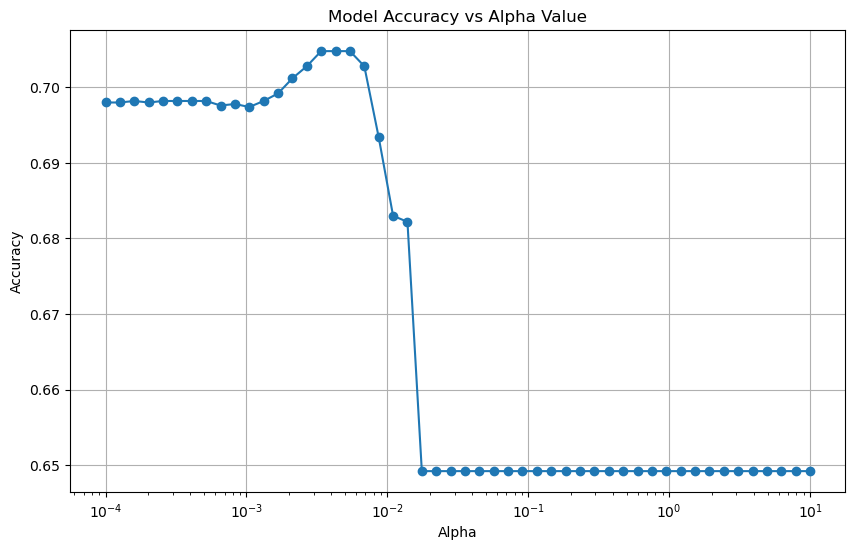

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)
y = data['MonkeyPox']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of alpha values to test
alphas = np.logspace(-4, 1, 50)  # Values from 0.0001 to 10

# Store accuracy for each alpha value
accuracies = []

for alpha in alphas:
    lasso = LassoCV(alphas=[alpha], cv=5)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))  # Assuming binary classification
    accuracies.append(accuracy)

# Plotting the accuracies against alpha values
plt.figure(figsize=(10, 6))
plt.plot(alphas, accuracies, marker='o')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Alpha Value')
plt.grid()
plt.show()

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of positive alpha values to test
alphas = np.logspace(-4, 1, 10)  # Values from 0.0001 to 10

# Store accuracy scores for each alpha value
results = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    # Perform cross-validation and store the accuracy scores
    scores = cross_val_score(lasso, X_train, y_train, cv=5, scoring='accuracy')
    results.append(scores)

# Convert results into a DataFrame for easier plotting
results_df = pd.DataFrame(results, index=alphas).T

# Calculate the mean accuracy for each alpha value
mean_accuracies = results_df.mean()

# Create a line chart to visualize model accuracy across different alpha values
plt.figure(figsize=(12, 6))
plt.plot(mean_accuracies.index, mean_accuracies.values, marker='o', linestyle='-', color='b')

# Annotate the best alpha value based on highest mean accuracy
best_alpha_index = np.argmax(mean_accuracies)
best_alpha_value = mean_accuracies.index[best_alpha_index]
best_accuracy_value = mean_accuracies.values[best_alpha_index]

plt.annotate(f'Best Alpha: {best_alpha_value:.4f}\nMean Accuracy: {best_accuracy_value:.2f}', 
             xy=(best_alpha_value, best_accuracy_value), 
             xytext=(best_alpha_value * 1.5, best_accuracy_value + 0.02),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Set logarithmic scale for x-axis and labels
plt.xscale('log')  # Set x-axis to logarithmic scale for better visibility of alpha values
plt.xlabel('Alpha Values')
plt.ylabel('Mean Accuracy')
plt.title('Model Accuracy vs Alpha Value in Lasso Regression')
plt.grid()
plt.xticks(ticks=np.arange(len(alphas)), labels=[f'{alpha:.4f}' for alpha in alphas], rotation=45)
plt.show()

C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 221, in a

C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 221, in a

C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py", line 221, in a

ValueError: Data has no positive values, and therefore cannot be log-scaled.

<Figure size 1200x600 with 1 Axes>

# Random Forest feature  importance

Optimal Threshold: 0.11
Best F1 Score: 0.80
Accuracy at Best Threshold: 0.68
Recall at Best Threshold: 0.96


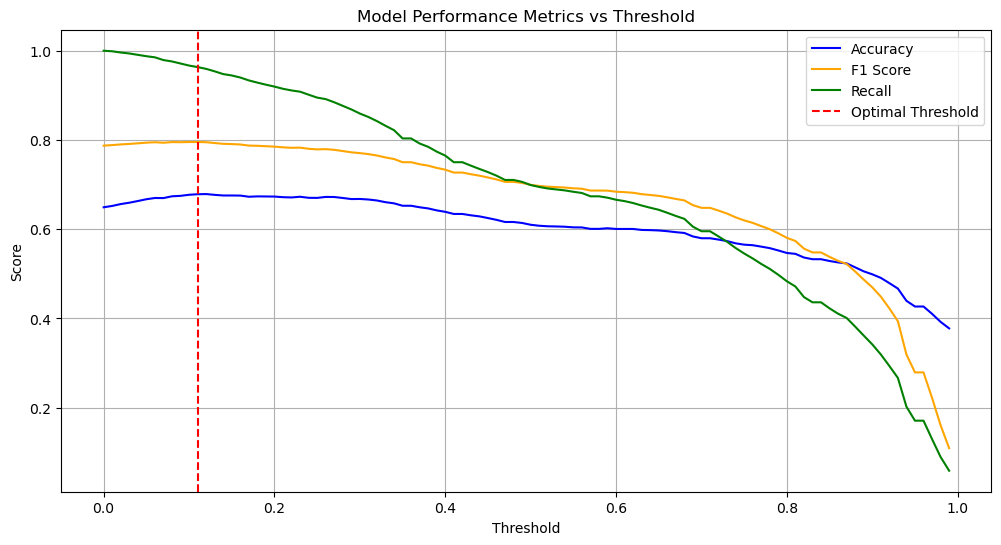

In [28]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# Define thresholds to evaluate
thresholds = np.arange(0.0, 1.0, 0.01)

# Store metrics for each threshold
accuracies = []
f1_scores = []
recalls = []

for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

# Find the best threshold based on F1 score
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1_score = f1_scores[best_index]
best_accuracy = accuracies[best_index]
best_recall = recalls[best_index]

print(f'Optimal Threshold: {best_threshold:.2f}')
print(f'Best F1 Score: {best_f1_score:.2f}')
print(f'Accuracy at Best Threshold: {best_accuracy:.2f}')
print(f'Recall at Best Threshold: {best_recall:.2f}')

# Plotting the metrics against thresholds
plt.figure(figsize=(12, 6))
plt.plot(thresholds, accuracies, label='Accuracy', color='blue')
plt.plot(thresholds, f1_scores, label='F1 Score', color='orange')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.axvline(x=best_threshold, color='red', linestyle='--', label='Optimal Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Model Performance Metrics vs Threshold')
plt.legend()
plt.grid()
plt.show()

Selected Features: ['Patient_ID']
Accuracy with Selected Features: 0.53
F1 Score with Selected Features: 0.64
Recall with Selected Features: 0.64


In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.feature_selection import SelectFromModel

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Define thresholds for feature selection based on importance scores
thresholds = [0.01, 0.05, 0.10]  # Example thresholds

results = []

for threshold in thresholds:
    # Select features based on threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
    
    # Train new model with selected features
    rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_selected.fit(X_train[selected_features], y_train)
    
    # Make predictions and evaluate performance
    y_pred = rf_selected.predict(X_test[selected_features])
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results.append({
        'Threshold': threshold,
        'Selected Features': selected_features,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Recall': recall,
    })

# Convert results into DataFrame for better visualization
results_df = pd.DataFrame(results)

print(results_df)

   Threshold                                  Selected Features  Accuracy  \
0       0.01  [Patient_ID, Systemic Illness, HIV Infection, ...    0.6140   
1       0.05                     [Patient_ID, Systemic Illness]    0.5672   
2       0.10                                       [Patient_ID]    0.5336   

   F1 Score    Recall  
0  0.703168  0.704251  
1  0.661981  0.652803  
2  0.639344  0.636784  


In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rf.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select features based on the optimal threshold of 0.01
optimal_threshold = 0.02
selected_features = feature_importance_df[feature_importance_df['Importance'] > optimal_threshold]['Feature'].tolist()

print("Selected Features based on Optimal Threshold (0.01):", selected_features)

# Train a new Random Forest model using only the selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train[selected_features], y_train)

# Make predictions and evaluate accuracy on the test set using selected features
y_pred = rf_selected.predict(X_test[selected_features])

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy with Selected Features: {accuracy:.2f}')
print(f'F1 Score with Selected Features: {f1:.2f}')
print(f'Recall with Selected Features: {recall:.2f}')

Selected Features based on Optimal Threshold (0.01): ['Patient_ID', 'Systemic Illness', 'HIV Infection', 'Swollen Tonsils', 'Rectal Pain', 'Sexually Transmitted Infection', 'Solitary Lesion', 'Oral Lesions', 'Sore Throat']
Accuracy with Selected Features: 0.61
F1 Score with Selected Features: 0.69
Recall with Selected Features: 0.69


In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score


# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rf.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Define an optimal threshold for feature selection (e.g., 0.01)
optimal_threshold = 0.10

# Select features based on the optimal threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > optimal_threshold]['Feature'].tolist()

print("Selected Features based on Optimal Threshold (0.01):", selected_features)

# Train a Gradient Boosting model using only the selected features
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train[selected_features], y_train)

# Make predictions and evaluate accuracy on the test set using selected features
y_pred = gb_model.predict(X_test[selected_features])

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy with Selected Features: {accuracy:.2f}')
print(f'F1 Score with Selected Features: {f1:.2f}')
print(f'Recall with Selected Features: {recall:.2f}')

# Optionally compare with all features (without selection)
gb_model_all = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_all.fit(X_train, y_train)

y_pred_all = gb_model_all.predict(X_test)

accuracy_all = accuracy_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)
recall_all = recall_score(y_test, y_pred_all)

print(f'\nPerformance without Feature Selection:')
print(f'Accuracy: {accuracy_all:.2f}')
print(f'F1 Score: {f1_all:.2f}')
print(f'Recall: {recall_all:.2f}')

Selected Features based on Optimal Threshold (0.01): ['Patient_ID']
Accuracy with Selected Features: 0.65
F1 Score with Selected Features: 0.79
Recall with Selected Features: 0.99

Performance without Feature Selection:
Accuracy: 0.70
F1 Score: 0.79
Recall: 0.88


In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rf.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Define an optimal threshold for feature selection (e.g., 0.10)
optimal_threshold = 0.10

# Select features based on the optimal threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > optimal_threshold]['Feature'].tolist()

print("Selected Features based on Optimal Threshold (0.10):", selected_features)

# Train a Gradient Boosting model using only the selected features
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train[selected_features], y_train)

# Make predictions and evaluate accuracy on the test set using selected features
y_pred = gb_model.predict(X_test[selected_features])
y_pred_proba = gb_model.predict_proba(X_test[selected_features])[:, 1]  # Get probabilities for AUC-ROC

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Calculate AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate specificity (True Negative Rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print(f'\nPerformance with Selected Features:')
print(f'Accuracy: {accuracy:.2%}')
print(f'Precision: {precision:.2%}')
print(f'Recall: {recall:.2%}')
print(f'F1 Score: {f1:.2%}')
print(f'AUC-ROC Score: {roc_auc:.2%}')
print(f'Specificity: {specificity:.2%}')

# Optionally compare with all features (without selection)
gb_model_all = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model_all.fit(X_train, y_train)

y_pred_all = gb_model_all.predict(X_test)

accuracy_all = accuracy_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all)
recall_all = recall_score(y_test, y_pred_all)
precision_all = precision_score(y_test, y_pred_all)
y_pred_proba_all = gb_model_all.predict_proba(X_test)[:, 1]  # Get probabilities for AUC-ROC
roc_auc_all = roc_auc_score(y_test, y_pred_proba_all)

# Calculate confusion matrix for specificity calculation without selection
tn_all, fp_all, fn_all, tp_all = confusion_matrix(y_test, y_pred_all).ravel()
specificity_all = tn_all / (tn_all + fp_all) if (tn_all + fp_all) > 0 else 0

print(f'\nPerformance without Feature Selection:')
print(f'Accuracy: {accuracy_all:.2%}')
print(f'Precision: {precision_all:.2%}')
print(f'Recall: {recall_all:.2%}')
print(f'F1 Score: {f1_all:.2%}')
print(f'AUC-ROC Score: {roc_auc_all:.2%}')
print(f'Specificity: {specificity_all:.2%}')

Selected Features based on Optimal Threshold (0.10): ['Patient_ID']

Performance with Selected Features:
Accuracy: 64.74%
Precision: 64.93%
Recall: 99.35%
F1 Score: 78.53%
AUC-ROC Score: 47.99%
Specificity: 0.68%

Performance without Feature Selection:
Accuracy: 70.26%
Precision: 72.17%
Recall: 88.20%
F1 Score: 79.38%
AUC-ROC Score: 70.27%
Specificity: 37.06%


In [ ]:
Random forest feature importance without feature selection 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Random Forest (GB)

Columns in the dataset: Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')
Selected Features (Top 5): ['Patient_ID', 'Systemic Illness', 'HIV Infection', 'Swollen Tonsils', 'Rectal Pain']
Model Accuracy with Top Features: 68.98%


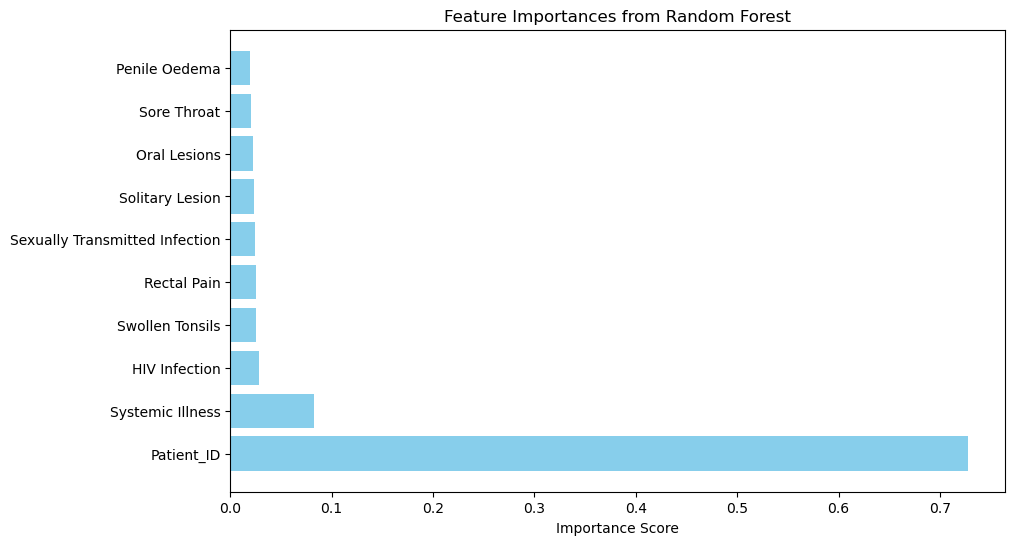

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('DATA.csv')  # Adjust the path accordingly

# Print column names to verify the structure of your DataFrame
print("Columns in the dataset:", data.columns)

#Converting the text into numerical of all the columns 
features=["Rectal Pain","Sore Throat","Penile Oedema","Oral Lesions","Solitary Lesion","Swollen Tonsils","HIV Infection","Sexually Transmitted Infection"]
for col in features:
    data[col]=data[col].replace({True:1,False:0})
    
data['MonkeyPox']=data['MonkeyPox'].replace({'Negative':0,'Positive':1})

# None =0  fever =1   Swollen Lymph Nodes=2     Muscle Aches and Pain=3
data['Systemic Illness']=data['Systemic Illness'].replace({'None':0,'Fever':1,'Swollen Lymph Nodes':2,'Muscle Aches and Pain':3})

data['Patient_ID'] = data['Patient_ID'].str.replace('P','', regex=False).astype(int)
data

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances from the trained model
importances = rf.feature_importances_

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Specify the number of top features to select (k)
k = 5 # Change this value to select a different number of top features

# Ensure k does not exceed the number of available features
if k > len(feature_importance_df):
    raise ValueError(f"k cannot be greater than the number of features available: {len(feature_importance_df)}")

# Select top k features based on importance scores
selected_features = feature_importance_df['Feature'].head(k).tolist()

print(f'Selected Features (Top {k}):', selected_features)

# Train Gradient Boosting model using only the selected features
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train[selected_features], y_train)

# Make predictions and evaluate accuracy on test set using selected features
y_pred = gb_model.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy with Top Features: {:.2f}%".format(accuracy * 100))

# Optional: Plotting feature importances for visualization
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.show()

# HYPERPARAMETER  TUNING 

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'loss': ['log_loss','deviance', 'exponential'],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'criterion': ['friedman_mse','squared_error', 'mae'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [3, 4, 5],
    'max_features': ['auto','log2','sqrt', None],
    'verbose': [2],  # You can adjust this if you want verbose output
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=200,  # Number of different combinations to try
                                   scoring='f1',  # Use F1 score as the evaluation metric
                                   cv=5,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)  # Use all available cores

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best model from random search
best_model = random_search.best_estimator_

# Make predictions with the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])  # AUC-ROC score

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print("Best Hyperparameters:", random_search.best_params_)
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
680 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\pulip\anaconda3\envs\DL\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\User

      Iter       Train Loss   Remaining Time 
         1           1.3138            3.11s
         2           1.3125            1.55s
         3           1.3115            2.06s
         4           1.3102            1.54s
         5           1.3089            1.83s
         6           1.3082            1.52s
         7           1.3069            1.73s
         8           1.3059            1.51s
         9           1.3052            1.66s
        10           1.3046            1.49s
        11           1.3038            1.69s
        12           1.3029            1.54s
        13           1.3020            1.58s
        14           1.3014            1.46s
        15           1.3007            1.55s
        16           1.2995            1.45s
        17           1.2989            1.52s
        18           1.2980            1.59s
        19           1.2974            1.50s
        20           1.2968            1.41s
        21           1.2959            1.47s
        2

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Classifier
model = GradientBoostingClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'loss': ['log_loss','deviance', 'exponential'],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'criterion': ['friedman_mse','squared_error', 'mae'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [3, 4, 5],
    'max_features': ['auto','log2','sqrt', None],
    'verbose': [2],  # You can adjust this if you want verbose output
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_dist,
                                   n_iter=200,  # Number of different combinations to try
                                   scoring='f1',  # Use F1 score as the evaluation metric
                                   cv=5,
                                   verbose=1,
                                   random_state=42,
                                   n_jobs=-1)  # Use all available cores

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best model from random search
best_model = random_search.best_estimator_

# Make predictions with the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])  # AUC-ROC score

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print("Best Hyperparameters:", random_search.best_params_)
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
320 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
213 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\pulip\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\pulip\anaconda3\Lib\site-package

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3122           0.0010            3.12s
         2           1.3124           0.0009            1.55s
         3           1.3146           0.0012            2.06s
         4           1.3099           0.0010            1.53s
         5           1.3107           0.0008            1.83s
         6           1.3086           0.0012            1.52s
         7           1.3055           0.0017            1.73s
         8           1.3031           0.0011            1.50s
         9           1.2988           0.0013            1.66s
        10           1.3022           0.0012            1.78s
        11           1.2995           0.0012            1.61s
        12           1.3002           0.0013            1.72s
        13           1.2969           0.0014            1.58s
        14           1.2966           0.0009            1.67s
        15           1.2978           0.0012            1.55s
       

       145           1.2204           0.0003            0.48s
       146           1.2181           0.0002            0.47s
       147           1.2169           0.0002            0.46s
       148           1.2175           0.0002            0.45s
       149           1.2178           0.0003            0.44s
       150           1.2135           0.0001            0.44s
       151           1.2179           0.0003            0.42s
       152           1.2199           0.0003            0.42s
       153           1.2142           0.0003            0.41s
       154           1.2164           0.0003            0.40s
       155           1.2157           0.0002            0.39s
       156           1.2127           0.0001            0.38s
       157           1.2144           0.0003            0.37s
       158           1.2142           0.0002            0.36s
       159           1.2146           0.0002            0.35s
       160           1.2109           0.0002            0.34s
       1

In [ ]:
#NOW  Applying  GridSearchCV  for 100  iters  on PCA 

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Best parameters from RandomizedSearchCV
best_params = {
    'subsample': 0.8,
    'n_estimators': 200,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 4,
    'loss': 'log_loss',
    'learning_rate': 0.01,
    'criterion': 'squared_error',
}

# Define a narrower parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [190, 200, 210],  # Slight variation around best found
    'learning_rate': [0.01, 0.02],
    'max_depth': [3, 4, 5],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [1, 2],
}

# Initialize the Gradient Boosting Classifier with best parameters
model = GradientBoostingClassifier(**best_params)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='f1',  # You can choose other scoring metrics as needed
                           cv=5,
                           verbose=1,
                           n_jobs=-1)     # Use all available cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions with the best model on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])  # AUC-ROC score

# Calculate confusion matrix for specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print results in percentage format
print("Best Hyperparameters from Grid Search:", grid_search.best_params_)
print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")
print(f"AUC-ROC Score: {roc_auc:.2%}")
print(f"Specificity: {specificity:.2%}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters from Grid Search: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 190}
Accuracy: 69.80%
Precision: 69.44%
Recall: 95.53%
F1 Score: 80.42%
AUC-ROC Score: 70.35%
Specificity: 22.18%


In [12]:
#To know  the number of combinations that it will  trying : 
print(3*3*3*3*2)
    

162


In [ ]:
# Compareing  Which will  be working Better Randomised or Grid

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Separate features and target variable
X = data.drop('MonkeyPox', axis=1)  # Replace 'MonkeyPox' with your actual target column name
y = data['MonkeyPox']  # Replace 'MonkeyPox' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'loss': ['log_loss'],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_depth': [3, 4, 5],
    'max_features': ['auto', 'sqrt', None],
}

# Initialize the model
model = GradientBoostingClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,  # Number of different combinations to try
    scoring='f1',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best model from random search
best_model_random = random_search.best_estimator_

# Make predictions with the best model on the test set
y_pred_random = best_model_random.predict(X_test)

# Calculate performance metrics for RandomizedSearchCV
accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random)
recall_random = recall_score(y_test, y_pred_random)
f1_random = f1_score(y_test, y_pred_random)
roc_auc_random = roc_auc_score(y_test, best_model_random.predict_proba(X_test)[:, 1])

# Print results for RandomizedSearchCV
print("Best Hyperparameters from RandomizedSearchCV:", random_search.best_params_)
print(f"Randomized Search - Accuracy: {accuracy_random:.2%}")
print(f"Randomized Search - Precision: {precision_random:.2%}")
print(f"Randomized Search - Recall: {recall_random:.2%}")
print(f"Randomized Search - F1 Score: {f1_random:.2%}")
print(f"Randomized Search - AUC-ROC Score: {roc_auc_random:.2%}")

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model_grid = grid_search.best_estimator_

# Make predictions with the best model on the test set
y_pred_grid = best_model_grid.predict(X_test)

# Calculate performance metrics for GridSearchCV
accuracy_grid = accuracy_score(y_test, y_pred_grid)
precision_grid = precision_score(y_test, y_pred_grid)
recall_grid = recall_score(y_test, y_pred_grid)
f1_grid = f1_score(y_test, y_pred_grid)
roc_auc_grid = roc_auc_score(y_test, best_model_grid.predict_proba(X_test)[:, 1])

# Print results for GridSearchCV
print("Best Hyperparameters from GridSearchCV:", grid_search.best_params_)
print(f"Grid Search - Accuracy: {accuracy_grid:.2%}")
print(f"Grid Search - Precision: {precision_grid:.2%}")
print(f"Grid Search - Recall: {recall_grid:.2%}")
print(f"Grid Search - F1 Score: {f1_grid:.2%}")
print(f"Grid Search - AUC-ROC Score: {roc_auc_grid:.2%}")

# Compare Results
print("\nComparison of Randomized Search vs Grid Search:")
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'Randomized Search': [accuracy_random, precision_random, recall_random, f1_random, roc_auc_random],
    'Grid Search': [accuracy_grid, precision_grid, recall_grid, f1_grid, roc_auc_grid]
})

print(comparison_df)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters from RandomizedSearchCV: {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 4, 'loss': 'log_loss', 'learning_rate': 0.01, 'criterion': 'friedman_mse'}
Randomized Search - Accuracy: 69.78%
Randomized Search - Precision: 69.65%
Randomized Search - Recall: 94.73%
Randomized Search - F1 Score: 80.28%
Randomized Search - AUC-ROC Score: 70.43%
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Hyperparameters from GridSearchCV: {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'log_loss', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Grid Search - Accuracy: 68.40%
Grid Search - Precision: 67.88%
Grid Search - Recall: 97.44%
Grid Search - F1 Score: 80.02%
Grid Search - AUC-ROC Score: 70.27%

Comparison of Randomized Search vs Grid S